# Gameplan

This project will implement the step-by-step plan outlined in the book Machine Learning Engineering by Andriy Burkov. These steps will include the following in order:

1. Goal Preparation (Objective)
2. Data Collection & Preparation
  - Train, Valid, Test Split
  - Exploratory Data Analysis
    - Univariate Analysis
    - Correlation Analysis
    - Bivariate Analysis
3. Feature Engineering
  - Feature Scaling
  - Feature Importance
4. Model Training
5. Model Evaluation
6. Model Deployment
7. Model Serving
8. Model Monitoring
9. Model Maintenance

# Goal Preparation (Objective)

In this project, we will be creating a ML model implementation for the HouseCanary Bulk Housing Dataset.
- This will be a 'Build-Your-Dream-Home' front facing consumer app for the at-home user to input several characteristics they are looking for in buying a home and have a price come out the other end. The concept should be very easy to use and give a relatively near price estimate for the house they have created.
- On the app itself, we will feature a link that will lead the customer into our sales funnel by being able to input their home selections into a filter that will find exact matches of homes.
  - Although I will not build this section out, my goal is to show the business impact that a "Build-Your-Dream-Home" app would have in leading customers to start the home buying process more smoothly.

We will focus on fast predictions with a small amount of columns used. Ease-of-use and interpretability are key objectives for this model.

**At the end, we will then download a newer version of the dataset to simulate the model being in production. This dataset will be seperate from our test dataset and will provide insights into how the model would perform 'in-the-wild'.**

We will also keep in mind that the project will not offer a great deal of accuracy because the dataset we have chosen is limited in size. However, the concepts laid out in the ML project will be solid and get better if we had access to a larger version of this dataset.
- we posit that since the output is a continuous variable quantifying a total, ML is the correct solution for our task

We will aim to use the Adjusted-$R^2$ metric to show how far away our predictions are in terms of standard deviation
- exact money amounts are not needed for this project since this is just a fun way for our customer to 'basically' envision how much their dream home would cost
- we will be aiming for less than **FILL INNNNNNN**

The impact of the project in terms of customer sentiment is our priority
- the cost of inaccurate predictions is low
- the cost of running this basic model is also low

**NOTE:** Ideally, in the real world we would have access to more data than we have in this project which could change the complexity of the model and what algorithm we ended up using.
- these notes are listed throughout where I would recommend changes to account for more data

The over-arching goal is to demonstrate real-world ML techniques on a 'messy' real-world dataset that translates well for business use.

Our Target (Outcome) variable is:

```value_assessed```

# Data Collection & Preparation

For ease of use, I include all libraries used in the project in one cell for easy import:

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Selection and Encoding

# ML Model Implementations

# Hyperparameter Tuning

# Metrics

# Managing Warnings

## Python Library Version Control

Lets import Standard Python libraries for working with the files/versions in our project

In [ ]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile
from io import StringIO

We then need to install miniconda if it isnt already installed on your device. Interestingly enough this was not done in my Google colab notebook so I've included the cell here

**Make sure to comment out this cell after the installation so you can use Run All without adding extra time**

In [ ]:
#!wget -nv https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
#!rm Miniconda3-latest-Linux-x86_64.sh

#sys.path.append('/usr/local/lib/python3.7/site-packages/')

Next we'll create a list of all installed packages to check whether a package has already been installed and show which version it is installed with.

This shouldn't be an issued for the Google Colab folk but those using an IDE like VSCode for example would do well to have this list for ease of use.

In [ ]:
#conda_packages_list = io.StringIO(subprocess.Popen(['conda', 'list'],
#                                                         stdout=subprocess.PIPE).communicate()[0].decode('utf-8'))
#conda_packages_list = pd.read_csv(conda_packages_list,
#                                  names=['Package Name', 'Version', 'Python Version', 'Repo', 'Other'],
#                                  delim_whitespace=True,
#                                  skiprows=3)
#conda_packages_list.head()

We are now ready to bring in our data:

In [ ]:
data = pd.read_excel('Housing Data.xlsx')
data.head()

,assessment_apn,assessment_fips,hc_condition_class,address_slug,address,unit,city,state,zipcode,zipcode_plus4,...,lien2_lender_name,lien2_lender_type,lien2_loan_term,lien2_loan_type,lien2_data_assumptions,lien2_principal_paid,lien2_principal_outstanding,hc_address_id,hc_value_estimate,updated_at
0,WOLC M:111 B:6 L:7,9009.0,3.0,36-Cancellaro-Dr-Wolcott-CT-06716,36 Cancellaro Dr,NaN,Wolcott,CT,6716,1202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51182259,316200.0,2023-11-01
1,HTFD M:252 B:667 L:144,9003.0,4.0,154-Barker-St-Unit-156-Hartford-CT-06114,154 Barker St,Unit 156,Hartford,CT,6114,1818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77043978,316200.0,2023-11-02
2,15-047 -001-164,13139.0,4.0,7077-Boathouse-Way-Flowery-Branch-GA-30542,7077 Boathouse Way,NaN,Flowery Branch,GA,30542,5901.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256089253,1000000.0,2023-10-27
3,282618932911000000,12105.0,5.0,1074-Preserve-Dr-Davenport-FL-33896,1074 Preserve Dr,NaN,Davenport,FL,33896,8628.0,...,SPRING EQ LLC,M,360.0,REVOLVING_CREDIT_LINE,NaN,118.0,75902.0,281881920,316200.0,2023-11-22
4,493-460-22-00,6073.0,5.0,1174-Rathmoor-St-El-Cajon-CA-92020,1174 Rathmoor St,NaN,El Cajon,CA,92020,7745.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21015538,1000000.0,2023-10-14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 184 entries, assessment_apn to updated_at
dtypes: datetime64[ns](9), float64(97), int64(3), object(75)
memory usage: 1.4+ MB


In [ ]:
print(list(data.columns))

['assessment_apn', 'assessment_fips', 'hc_condition_class', 'address_slug', 'address', 'unit', 'city', 'state', 'zipcode', 'zipcode_plus4', 'latitude', 'longitude', 'geo_precision', 'block_id', 'block_group_id', 'tract_id', 'fips', 'county', 'metro_division_id', 'msa_id', 'address_street_number', 'address_pre_direction', 'address_street_name', 'address_street_type', 'address_post_direction', 'address_unit_type', 'address_unit_number', 'legal_description', 'subdivision', 'tax_amount_annual', 'tax_exemption_codes', 'tax_year', 'value_assessed_year', 'value_assessed', 'value_assessed_improvement', 'value_assessed_land', 'value_assessed_year_prior', 'value_assessed_prior', 'value_assessed_improvement_prior', 'value_assessed_land_prior', 'owner_occupied_yn', 'owner_name', 'owner_vesting_type', 'owner_address', 'owner_unit_type', 'owner_unit_number', 'owner_city', 'owner_state', 'owner_zip', 'owner_zip_plus4', 'property_type', 'county_land_use_type', 'county_land_use_sub_type', 'year_built',

## Data Cleaning & Aggregation

Our dataset has 184 columns which is massive!

Part of the reason why I chose to use this dataset was because of this massive column space.
- It simulates many datasets in the industry and got me out of my comfort zone a little instead of the 'clean' practice datasets with a max of around 10 columns.

Lets now see if we have any duplicates in our data

In [ ]:
data['address'].nunique()

999

In [ ]:
data['address_slug'].nunique()

999

Any good data analyst will tell you that before we can even begin the process we have to take a really strong look at our data. I used the data dictionary that was included with the dataset to go through and highlight features that I wanted to include for my model (which will be included as a reference for this project).

In retrospect, I do not have very much domain knowledge on this topic so the columns that I chose to start with may not be ones that a domain knowledge expert would have chosen. If I were to do this part on the job, I would have opened a dialogue with different stakeholders and domain experts to come up with a more targeted feature landscape. For the sake of this project now, these are my features:

In [ ]:
df = data[['value_assessed', 'state', 'property_type', 'living_area', 'bedrooms',
           'bathrooms_full', 'bathrooms_partial', 'lot_size', 'architectural_style',
           'attic_yn', 'basement_yn', 'fireplace_yn', 'fireplaces_total', 'parking_garage',
           'parking_total', 'pool_yn', 'rooms_total', 'solar_panels_yn']]

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
value_assessed,947.0,264095.38,347805.24,460.0,57235.00,163000.0,345592.00,4362389.0
living_area,988.0,1870.46,914.86,366.0,1241.25,1654.5,2221.75,7531.0
bedrooms,999.0,3.14,1.00,0.0,3.00,3.0,4.00,8.0
bathrooms_full,749.0,1.83,0.81,0.0,1.00,2.0,2.00,6.0
bathrooms_partial,370.0,0.76,0.55,0.0,0.00,1.0,1.00,3.0
lot_size,865.0,105884.76,548132.83,48.0,6621.00,10454.0,23514.00,7094617.2
attic_yn,29.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
basement_yn,637.0,0.62,0.49,0.0,0.00,1.0,1.00,1.0
fireplace_yn,376.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
fireplaces_total,289.0,1.14,0.40,1.0,1.00,1.0,1.00,4.0


Since the solar panels and attic columns have so few of values and do not add that much to our model, we will choose to drop these columns.

In [ ]:
df = df.drop(['solar_panels_yn', 'attic_yn'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value_assessed       947 non-null    float64
 1   state                999 non-null    object 
 2   property_type        999 non-null    object 
 3   living_area          988 non-null    float64
 4   bedrooms             999 non-null    int64  
 5   bathrooms_full       749 non-null    float64
 6   bathrooms_partial    370 non-null    float64
 7   lot_size             865 non-null    float64
 8   architectural_style  302 non-null    object 
 9   basement_yn          637 non-null    float64
 10  fireplace_yn         376 non-null    float64
 11  fireplaces_total     289 non-null    float64
 12  parking_garage       604 non-null    float64
 13  parking_total        727 non-null    float64
 14  pool_yn              612 non-null    float64
 15  rooms_total          598 non-null    flo

## Fixing NaN values

First and foremost we need to locate all the null values in the dataset and convert them into `NaN` values.
- This will make all of the operations we need to do on this dataset a lot easier

In [ ]:
# check to see what the value of null is
df['bathrooms_partial'].unique()

array([nan,  1.,  0.,  2.,  3.])

In [ ]:
df.replace('nan', np.nan)

,value_assessed,state,property_type,living_area,bedrooms,bathrooms_full,bathrooms_partial,lot_size,architectural_style,basement_yn,fireplace_yn,fireplaces_total,parking_garage,parking_total,pool_yn,rooms_total
0,200820.0,CT,SFR,1452.0,3,3.0,NaN,30931.15,Raised Ranch,1.0,1.0,2.0,0.0,NaN,1.0,7.0
1,96028.0,CT,MULTI_FAMILY,3148.0,6,NaN,NaN,7588.00,NaN,1.0,NaN,NaN,1.0,1.0,NaN,15.0
2,192480.0,GA,SFR,3091.0,3,3.0,1.0,10019.00,Log Cabin/Rustic,1.0,1.0,1.0,NaN,NaN,NaN,10.0
3,283539.0,FL,SFR,2601.0,5,3.0,NaN,6050.00,NaN,0.0,NaN,NaN,2.0,2.0,1.0,10.0
4,709772.0,CA,SFR,2524.0,5,3.0,NaN,9600.00,NaN,NaN,NaN,NaN,3.0,6.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,593900.0,ID,SFR,2920.0,0,NaN,NaN,9670.00,NaN,NaN,1.0,1.0,3.0,3.0,0.0,NaN
995,332620.0,OR,SFR,2236.0,4,3.0,NaN,9584.30,NaN,0.0,1.0,1.0,NaN,2.0,0.0,NaN
996,209991.0,FL,SFR,1318.0,4,2.0,NaN,5494.00,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
997,637700.0,MA,SFR,2650.0,3,2.0,1.0,70000.00,Colonial,1.0,NaN,NaN,4.0,12.0,1.0,8.0


In [ ]:
df.isnull().sum()

,0
value_assessed,52
state,0
property_type,0
living_area,11
bedrooms,0
bathrooms_full,250
bathrooms_partial,629
lot_size,134
architectural_style,697
basement_yn,362


Wow, we have the bulk of our columns with many NaN values in them.

Since these features vary so much in terms of what they represent, we cannot just fill all NaN values with zero. In doing so, we would hurt our model's performance. We will have to take a targeted approach to segment the columns using different feature engineering techniques.

Before we implement Feature Engineering, its a good idea to see which rows have an excess of null values in them that could sway our model's performance.

Now we need to show how many rows have an excess of null values in them. This will determine if these rows will be dropped so as to maintain a solid foundation of data for the model.

In [ ]:
df['null_count'] = df.isnull().sum(axis=1)
df['null_count'].sort_values(ascending=False)

,null_count
275,11
909,11
864,11
604,11
469,11
...,...
596,0
186,0
35,0
638,0


In [ ]:
df.iloc[909]

,909
value_assessed,361050.0
state,FL
property_type,CONDO
living_area,1557.0
bedrooms,3
bathrooms_full,NaN
bathrooms_partial,NaN
lot_size,NaN
architectural_style,NaN
basement_yn,NaN


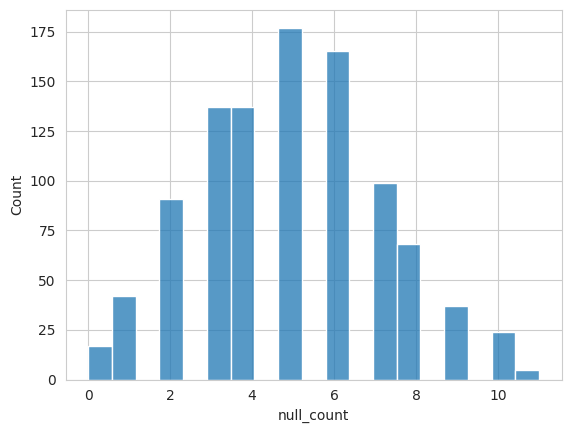

In [ ]:
sns.histplot(x='null_count', data=df)
plt.show()

Dealing with all of these rows with a high null count will be a tricky tradeoff.
- this is exactly when having a larger amount of data would be more beneficial to us, however, we will do the best with what we have

As a good compromise, we will remove all rows with more than 10 nulls in them.

In [ ]:
df['null_count'] = pd.to_numeric(df['null_count'], errors='coerce')
df = df[df['null_count'] < 10].copy()
df

,value_assessed,state,property_type,living_area,bedrooms,bathrooms_full,bathrooms_partial,lot_size,architectural_style,basement_yn,fireplace_yn,fireplaces_total,parking_garage,parking_total,pool_yn,rooms_total,null_count
0,200820.0,CT,SFR,1452.0,3,3.0,NaN,30931.15,Raised Ranch,1.0,1.0,2.0,0.0,NaN,1.0,7.0,2
1,96028.0,CT,MULTI_FAMILY,3148.0,6,NaN,NaN,7588.00,NaN,1.0,NaN,NaN,1.0,1.0,NaN,15.0,6
2,192480.0,GA,SFR,3091.0,3,3.0,1.0,10019.00,Log Cabin/Rustic,1.0,1.0,1.0,NaN,NaN,NaN,10.0,3
3,283539.0,FL,SFR,2601.0,5,3.0,NaN,6050.00,NaN,0.0,NaN,NaN,2.0,2.0,1.0,10.0,4
4,709772.0,CA,SFR,2524.0,5,3.0,NaN,9600.00,NaN,NaN,NaN,NaN,3.0,6.0,1.0,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,593900.0,ID,SFR,2920.0,0,NaN,NaN,9670.00,NaN,NaN,1.0,1.0,3.0,3.0,0.0,NaN,5
995,332620.0,OR,SFR,2236.0,4,3.0,NaN,9584.30,NaN,0.0,1.0,1.0,NaN,2.0,0.0,NaN,4
996,209991.0,FL,SFR,1318.0,4,2.0,NaN,5494.00,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,7
997,637700.0,MA,SFR,2650.0,3,2.0,1.0,70000.00,Colonial,1.0,NaN,NaN,4.0,12.0,1.0,8.0,2


To start the feature engineering process, we will take all the features that can take a zero input (such as bathrooms full, attic_yn, etc.). These are categorical variables with either yes/no inputs or a discrete (countable) number of inputs.

In deciding which columns to add to the list, I iteratively used the `.unique()` to observe the different values of the feature. I excluded my trials for brevity.

In [ ]:
columns_to_fill = ['bathrooms_full', 'bathrooms_partial', 'attic_yn', 'basement_yn',
                   'fireplace_yn', 'fireplaces_total', 'parking_garage', 'parking_total',
                   'pool_yn', 'rooms_total', 'solar_panels_yn']

# Use dict comprehension to create the fill dictionary
fill_dict = {col: 0 for col in columns_to_fill}

# Apply fillna with the created dictionary
df = df.fillna(fill_dict)

In [ ]:
df.isnull().sum()

,0
value_assessed,42
state,0
property_type,0
living_area,8
bedrooms,0
bathrooms_full,0
bathrooms_partial,0
lot_size,119
architectural_style,668
basement_yn,0


We will use the `columns_to_fill` and `fill_dict` as part of our feature engineering pipeline later in the project.

For Columns `living_area` and `lot_size` will implement a `SimpleImputer` which will take the overall mean of the column and input those values into the null values.
- We take under advisement that this will raise the priority of certain non-mean entries from the column and would take a different approach with more data
  - more data would give us more ability to delete these rows with null entries

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imp.fit_transform(df[['living_area', 'lot_size']])
df[['living_area', 'lot_size']] = imputed_data
df.isnull().sum()

,0
value_assessed,42
state,0
property_type,0
living_area,0
bedrooms,0
bathrooms_full,0
bathrooms_partial,0
lot_size,0
architectural_style,668
basement_yn,0


In [ ]:
df['architectural_style'].unique()

array(['Raised Ranch', nan, 'Log Cabin/Rustic', 'Ranch\\Rambler',
       'Conventional', 'Colonial', 'Mobile/Manufactured',
       'Traditional/Old', 'Other', 'Bungalow', 'Cottage', 'Contemporary',
       'Prefab, Modular', 'Cape Cod', 'Custom', 'Modern', 'A-Frame',
       'Victorian'], dtype=object)

As a way to minimize sway of the model, we utilize the 'Other' option to bucket any other styles that may not be listed here.

In [ ]:
df['architectural_style'] = df['architectural_style'].replace(np.nan, 'Other')

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
value_assessed,0
state,0
property_type,0
living_area,0
bedrooms,0
bathrooms_full,0
bathrooms_partial,0
lot_size,0
architectural_style,0
basement_yn,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value_assessed       928 non-null    float64
 1   state                928 non-null    object 
 2   property_type        928 non-null    object 
 3   living_area          928 non-null    float64
 4   bedrooms             928 non-null    int64  
 5   bathrooms_full       928 non-null    float64
 6   bathrooms_partial    928 non-null    float64
 7   lot_size             928 non-null    float64
 8   architectural_style  928 non-null    object 
 9   basement_yn          928 non-null    float64
 10  fireplace_yn         928 non-null    float64
 11  fireplaces_total     928 non-null    float64
 12  parking_garage       928 non-null    float64
 13  parking_total        928 non-null    float64
 14  pool_yn              928 non-null    float64
 15  rooms_total          928 non-null    float64


As we can see, all of our columns have been vetted for zero entries and are ready for the next stage of the process.

# Train, Valid, Test Split

Normalization and Standardization rely on your training data to fit their parameters: min and max for normalization and mean and SD for standardization.

**This also means you must fit those parameters using *only* your training data and *never* your testing data.**

Very important, encoders are fitted on the training data and transformed on the testing data. This is how the ML Pipeline should work.
- the testing data was created to extract the performance metrics of your model, so you should not use it to extract any other knowledge. If you do so, your performance metrics will be biased by the testing data, and you cannot infer that the same performance (shown in the test data) is likely to happen in production (when new data will come in).

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['value_assessed'])
y = df['value_assessed']

# Split the data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}\n')

print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (835, 16)
X_test: (93, 16)

y_train: (835,)
y_test: (93,)


# Exploratory Data Analysis

EDA employs various data visualization techniques to gain insight into datasets:
- Relationship Analysis - identifies correlations between variables to select relevant features and remove redundancies
  - Heatmaps
  - Scatter plots
- Distribution Analysis - Shows central tendency, variability, shape, and outliers to understand the characteristics of the data
  - histograms
  - Density plots
  - box plots
- Comparison - Quantifies differences between subgroups and reveals separate trends
  - bar charts
- Composition - Identifies biases by visualizing proportions, percentages, and counts within the data
  - pie charts

For Categorical data:
- Common visualization methods include bar charts, pie charts, and heatmaps. With these visualizations you can see the frequency of distributions across categories.
- Statistical analysis on categorical data involves calculating frequencies, proportions, and contingency tables.

For Numerical data:
- box plots, histograms, and scatter plots can provide greater insight into quantitative features like trends, distributions, and correlations.
- visualizations for numerical data use statistical methods like mean, median, and standard deviations

## Univariate Analysis - Histogram, Bar Chart, Countplot

We start our extensive EDA with Univariate (one-variable) analysis. We can use a bar chart for the categorical features and histograms for the numerical features.

Creating a master chart sheet will show us the spread of variance of certain variables. We note that the features with low variance will tend to contribute less to the final prediction of our target variable.

Lets create a graph function to easily visualize a rough view of our columns:

### Target Variable - Value Assessed

In [ ]:
y_train.describe().round(2)

,value_assessed
count,835.00
mean,268591.74
std,357495.87
min,460.00
25%,58315.00
50%,165900.00
75%,346877.00
max,4362389.00


A property that only costs $460!? That sounds too good to be true so lets find it and check it out:

In [ ]:
df.loc[y_train.idxmin()]

,29
value_assessed,460.0
state,SC
property_type,SFR
living_area,881.0
bedrooms,2
bathrooms_full,0.0
bathrooms_partial,0.0
lot_size,6534.0
architectural_style,Other
basement_yn,0.0


Judging by the living area and the lot size, I'm deeming this amount too good to be true. It could either be a labeling error or any other slew of possible explanations related to the seller.
- it could also mean that the `value_assessed` could be calculated on a monthly rent basis and the only way we could know that is to ask the data labeler
- the only thing we have to go by is the data dictionary definition which is "Latest assessed value for the property".

I would like to find other possibilities like this in our dataset and remove those rows so as to not sway our model too much. We will cap this at $10,000.
- In a perfect data rich world, we would not do this. This is a prime example of opening up a dialogue with our data annotators to see what the issue is.
  - either we need to update our data dictionary to adjust for rent vs. total mortgage or, most likely, tell the data labelers moving forward to only account for one or the other

In [ ]:
rows_less_than_10000 = y_train[y_train < 10000]
print(rows_less_than_10000.count())

33


We will then promptly remove those rows from our dataset:

In [ ]:
y_train = y_train[y_train >= 10000]
print(y_train.describe().round(2))

count        802.00
mean      279433.46
std       360680.38
min        10140.00
25%        69213.75
50%       179732.00
75%       352990.50
max      4362389.00
Name: value_assessed, dtype: float64


Now plotting this distribution we get:

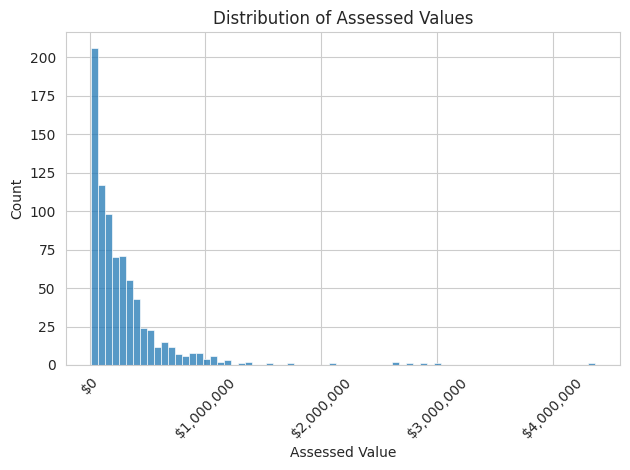

In [ ]:
import matplotlib.ticker as ticker

# Create the histogram
sns.histplot(x=y_train, data=df)

# Format x-axis labels as dollar amounts
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Assessed Values')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

Power transformations can be used to reduce the skewness of your feature and make it more similar to a normal distribution.

It is clear that our target variable is highly skewed to the right because of several outliers in our data. Given the presence of these outliers we can either focus on eliminating them or by choosing robust modeling techniques.

After several iterations down the ML project I had to come back and update this step. We will remove anything above $1.5 million.

In [ ]:
y_train = y_train[y_train < 1500000]
y_train

,value_assessed
64,177564.0
613,74400.0
176,63900.0
451,188000.0
246,18000.0
...,...
112,239800.0
289,269000.0
923,201000.0
463,118400.0


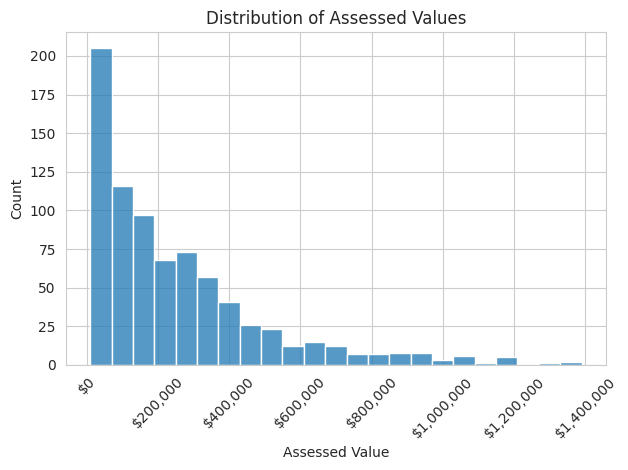

In [ ]:
# Create the histogram
sns.histplot(x=y_train, data=df)

# Format x-axis labels as dollar amounts
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Assessed Values')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

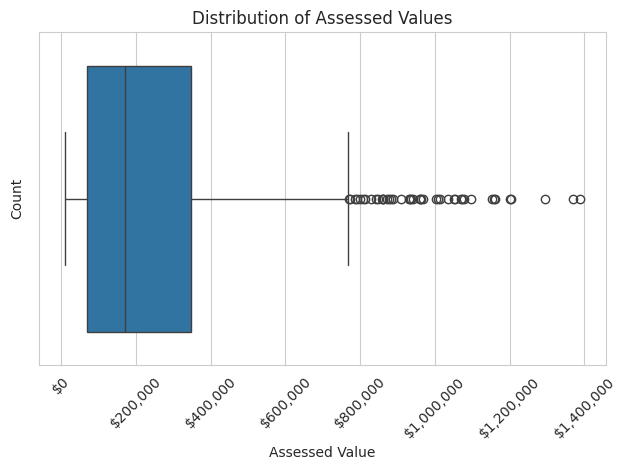

In [ ]:
# Create the histogram
sns.boxplot(x=y_train, data=df)

# Format x-axis labels as dollar amounts
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Assessed Values')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

Even though we removed all the columns we could, I'd still like to implement a log transformation with our target variable that would get us closer to a normal distribution.
- In doing this, we need to account for an inverse transformation later on in the pipeline to bring our log transformation back into a readable amount of money.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=False)
y_train_logged = pt.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# Shape and data type of the array
print("Shape:", y_train_logged.shape)
print("Data type:", y_train_logged.dtype)

# Basic descriptive statistics
print("Mean:", np.mean(y_train_logged))
print("Standard deviation:", np.std(y_train_logged))
print("Minimum:", np.min(y_train_logged))
print("Maximum:", np.max(y_train_logged))

Shape: (793, 1)
Data type: float64
Mean: 37.34224072992949
Standard deviation: 7.646315679741479
Minimum: 21.435058369496993
Maximum: 55.294556160716


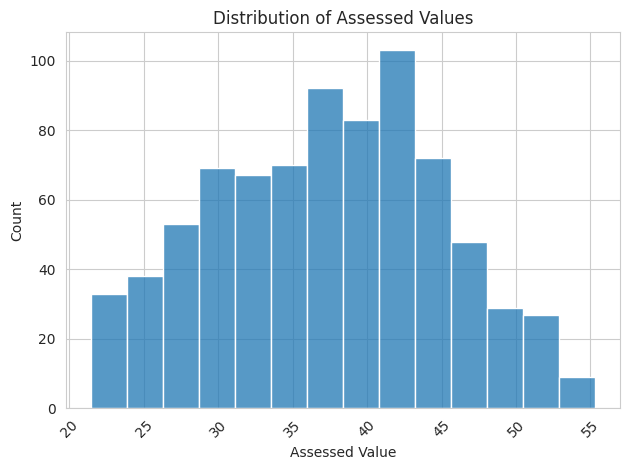

In [ ]:
# Create the histogram
sns.histplot(x=y_train_logged.flatten())

# Format x-axis labels as dollar amounts
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Assessed Values')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

We will need to do the same log transformation on our `y_test` set for evaluation purposes at the end of the project.
- we will keep the variable name `y_test` instead of `y_test_logged` to keep names straight at the end
- we are doing this because when we go to split our train and valid set, normal names are used without `logged`

In [ ]:
y_test = pt.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def shift_and_log(x):
  # Add offset and apply log transformation
  offset = abs(min(0, x.min())) + 1 # handles zeros and negatives amounts if they were to arise
  return np.log(x + offset)

def inverse_shift_and_log(x):
  # Inverse transformation to original scale
  offset = abs(min(0, x.min())) + 1
  return np.exp(x) - offset

log_transformer = FunctionTransformer(
    func=shift_and_log,
    inverse_func=inverse_shift_and_log,
    validate=True
)

### State

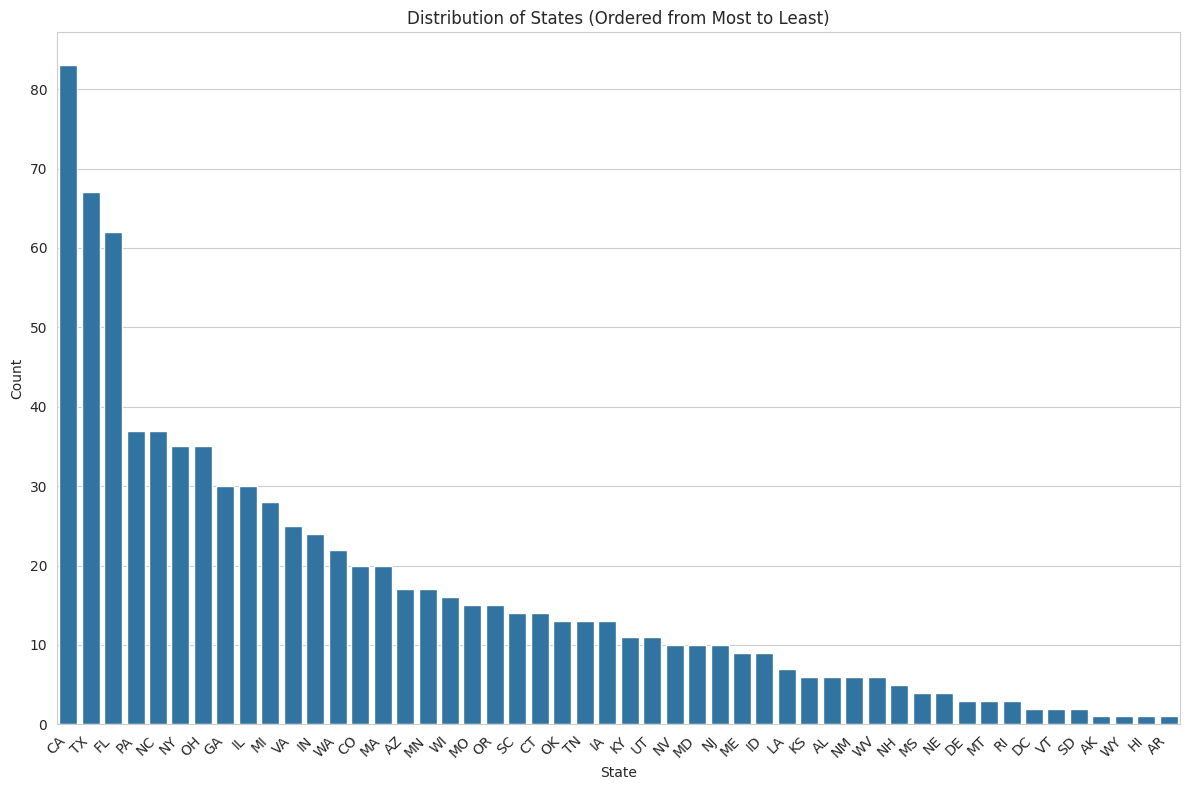

In [ ]:
# Sort the data by state frequency
state_counts = X_train['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

plt.figure(figsize=(12, 8))

# Create the countplot with the sorted data
sns.barplot(x='state', y='count', data=state_counts, order=state_counts['state'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of States (Ordered from Most to Least)')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

### Property Type

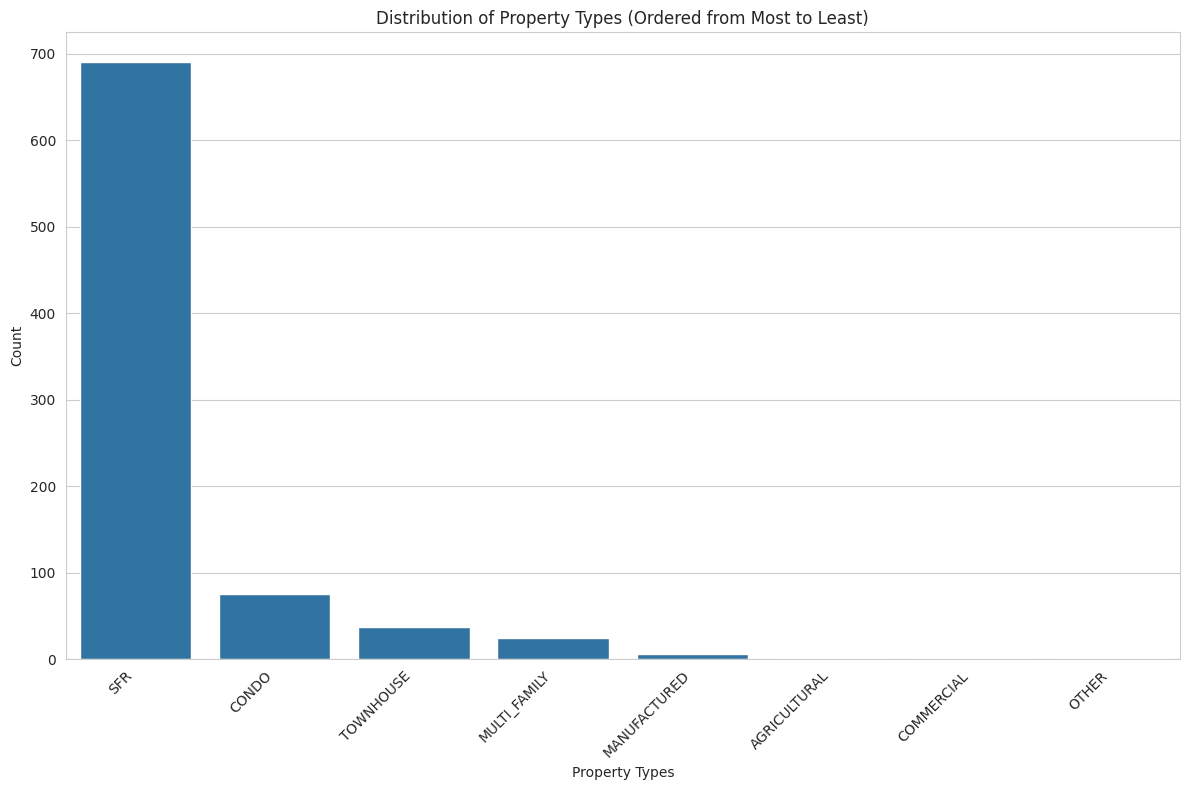

In [ ]:
# Sort the data by state frequency
property_counts = X_train['property_type'].value_counts().reset_index()
property_counts.columns = ['property', 'count']

plt.figure(figsize=(12, 8))

# Create the countplot with the sorted data
sns.barplot(x='property', y='count', data=property_counts, order=property_counts['property'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.title('Distribution of Property Types (Ordered from Most to Least)')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

### Living Area

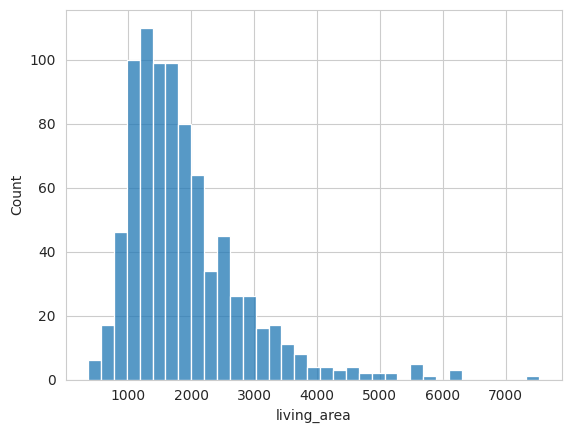

In [ ]:
sns.histplot(x='living_area', data=X_train)
plt.show()

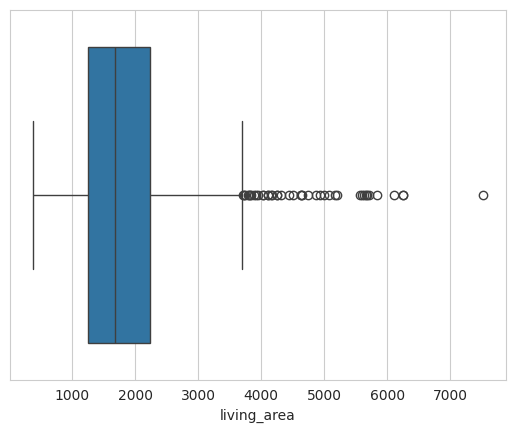

In [ ]:
sns.boxplot(x='living_area', data=df)
plt.show()

### Bedrooms

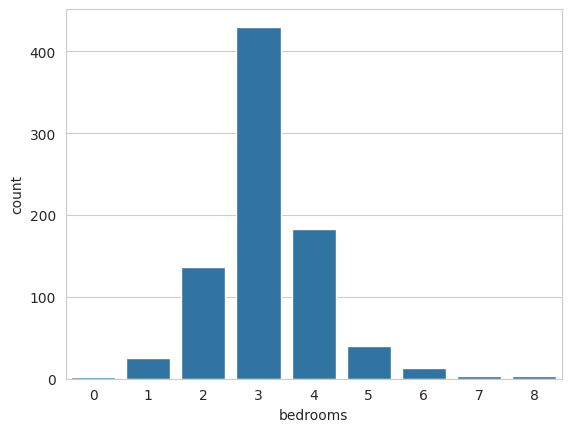

In [ ]:
sns.countplot(x='bedrooms', data=X_train)
plt.show()

### Bathrooms Full

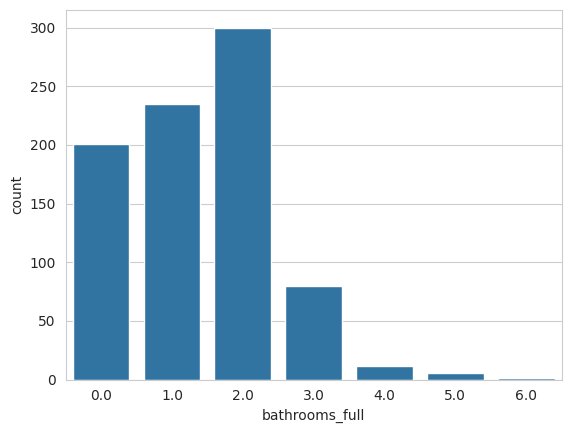

In [ ]:
sns.countplot(x='bathrooms_full', data=X_train)
plt.show()

### Bathrooms Partial

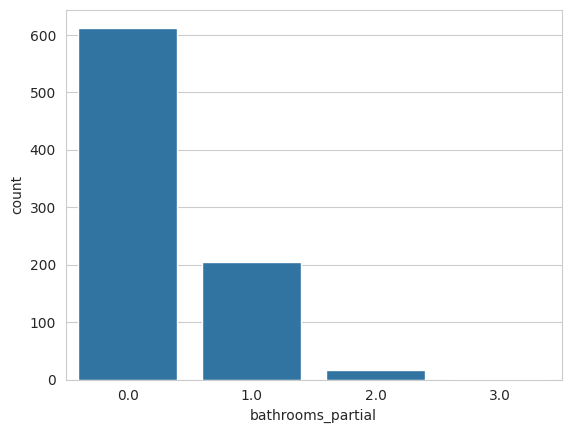

In [ ]:
sns.countplot(x='bathrooms_partial', data=X_train)
plt.show()

### Lot Size

In [ ]:
# Confirming no lot sizes are negative
indices = np.where(X_train['lot_size'] < 0)
indices

(array([], dtype=int64),)

In [ ]:
X_train['lot_size'].min()

48.0

In [ ]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables

In [ ]:
dataset_bin['lot_size'] = pd.cut(np.array(X_train['lot_size']), 5)

In [ ]:
dataset_bin.min()

,0
lot_size,"(-7046.569, 1418961.84]"


Next lets bin our lot sizes for ease of use later on. Lets let:
- Small: 0 to 5000
- Medium 5000 to 10000
- Large: 10000 to 20000
- Very Large: Greater than 20000

In [ ]:
bins = [0, 5000, 10000, 20000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Very Large']

X_train['lot_size_binned'] = pd.cut(X_train['lot_size'], bins=bins, labels=labels)

print(X_train['lot_size_binned'].value_counts())

lot_size_binned
Very Large    312
Medium        242
Large         177
Small         104
Name: count, dtype: int64


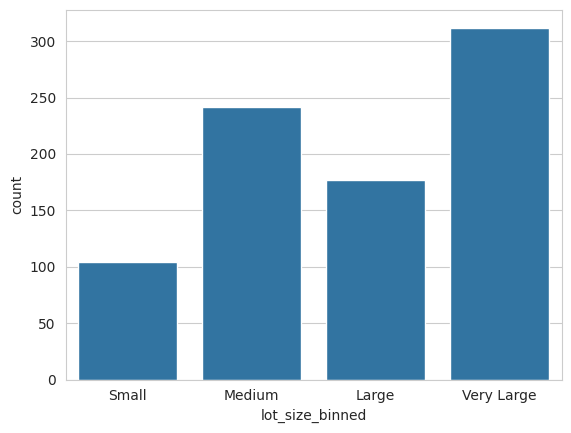

In [ ]:
sns.countplot(x='lot_size_binned', data=X_train)
plt.show()

Now that we binned the Lot Sizes, we will remove the `lot_size` column from our dataset:

In [ ]:
X_train.drop('lot_size', axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 64 to 108
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   state                835 non-null    object  
 1   property_type        835 non-null    object  
 2   living_area          835 non-null    float64 
 3   bedrooms             835 non-null    int64   
 4   bathrooms_full       835 non-null    float64 
 5   bathrooms_partial    835 non-null    float64 
 6   architectural_style  835 non-null    object  
 7   basement_yn          835 non-null    float64 
 8   fireplace_yn         835 non-null    float64 
 9   fireplaces_total     835 non-null    float64 
 10  parking_garage       835 non-null    float64 
 11  parking_total        835 non-null    float64 
 12  pool_yn              835 non-null    float64 
 13  rooms_total          835 non-null    float64 
 14  null_count           835 non-null    int64   
 15  lot_size_binned      835 no

After going through the project, I realized at the evaluation stage that I had not set this binning up for our test set.
- This is a prime example of what happens duing a ML Project; the steps are in place but for any number of reasons we may have to go back and change things from prior sections

I will be updated the columns for our `X_test` so that we can have a final evaluation at the end of the project.
- Keeping in mind that our goal was to minimize data leakage, so all of these transformations on columns were done after our initial test on the `X_train` set.

In [ ]:
X_test['lot_size_binned'] = pd.cut(X_test['lot_size'], bins=bins, labels=labels)
X_test.drop('lot_size', axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 809 to 430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   state                93 non-null     object  
 1   property_type        93 non-null     object  
 2   living_area          93 non-null     float64 
 3   bedrooms             93 non-null     int64   
 4   bathrooms_full       93 non-null     float64 
 5   bathrooms_partial    93 non-null     float64 
 6   architectural_style  93 non-null     object  
 7   basement_yn          93 non-null     float64 
 8   fireplace_yn         93 non-null     float64 
 9   fireplaces_total     93 non-null     float64 
 10  parking_garage       93 non-null     float64 
 11  parking_total        93 non-null     float64 
 12  pool_yn              93 non-null     float64 
 13  rooms_total          93 non-null     float64 
 14  null_count           93 non-null     int64   
 15  lot_size_binned      93 non

### Architectual Style

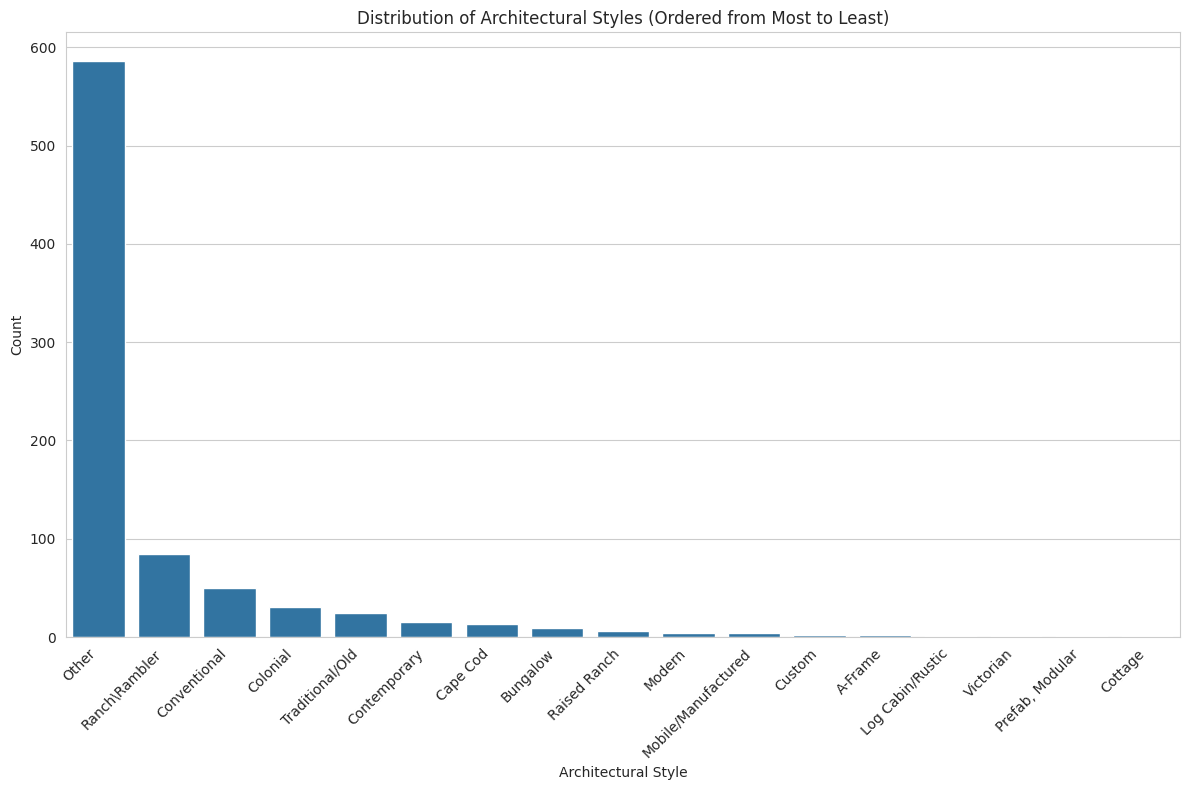

In [ ]:
# Sort the data by state frequency
arch_counts = X_train['architectural_style'].value_counts().reset_index()
arch_counts.columns = ['arch', 'count']

plt.figure(figsize=(12, 8))

# Create the countplot with the sorted data
sns.barplot(x='arch', y='count', data=arch_counts, order=arch_counts['arch'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Architectural Style')
plt.ylabel('Count')
plt.title('Distribution of Architectural Styles (Ordered from Most to Least)')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

Since we expect our customers to feel strongly about an architectural style should they so choose one, we can live with the possible strength of predictions based on their choosing.
- This would be the case that each of the styles in the chart do not have a lot of values associated with each one.
- If we had more data, we would increase the accuracy of each style substantially

### Basement Y/N

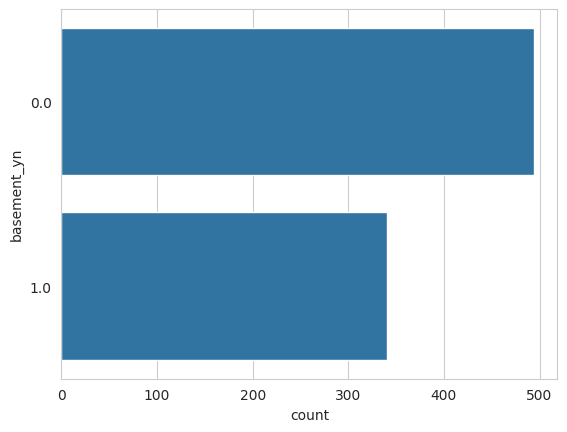

In [ ]:
sns.countplot(y='basement_yn', data=X_train)
plt.show()

In [ ]:
X_train['basement_yn'].value_counts()

,count
basement_yn,
0.0,494
1.0,341


### Fireplace Y/N

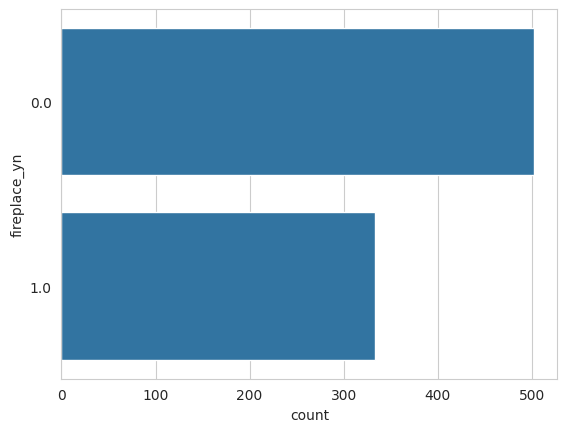

In [ ]:
sns.countplot(y='fireplace_yn', data=X_train)
plt.show()

In [ ]:
X_train['fireplace_yn'].value_counts()

,count
fireplace_yn,
0.0,502
1.0,333


### Fireplaces Total

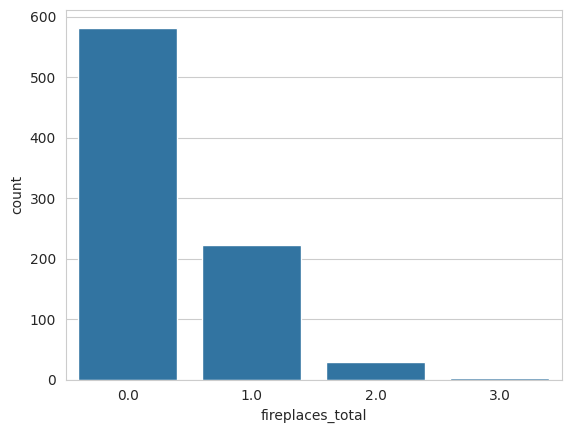

In [ ]:
sns.countplot(x='fireplaces_total', data=X_train)
plt.show()

### Parking Garage

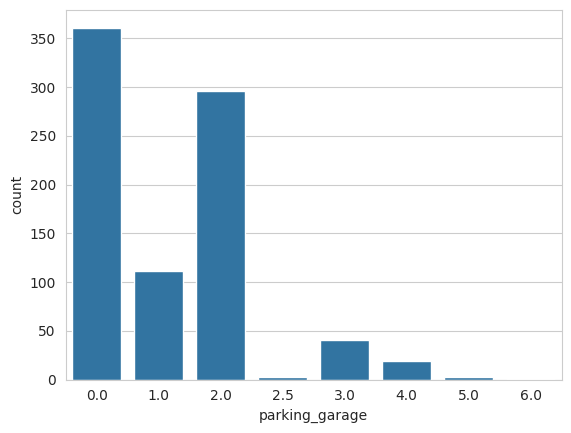

In [ ]:
sns.countplot(x='parking_garage', data=X_train)
plt.show()

### Parking Total

In [ ]:
X_train['parking_total'].unique()

array([ 2. ,  0. ,  3. ,  1. ,  4. ,  2.5, 10. , 12. ,  5. ,  7. ,  8. ,
       13. , 26. , 15. ,  6. ,  9. ])

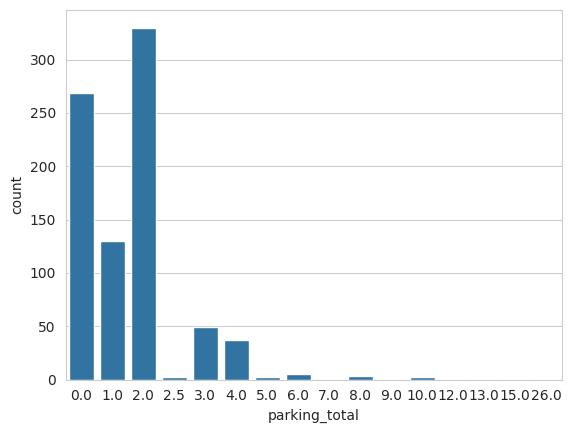

In [ ]:
sns.countplot(x='parking_total', data=X_train)
plt.show()

Since the amount of parking spots is rightly skewed, instead of performing any log transformations, I'm purposing instead that we bin the columns into 4 seperate options.
- in this example, we will assume that any 0 entry is deemed parking on the street but could possibly be another thing to bring up to the data annotators

In [ ]:
bins = [-float('inf'), 0, 1.0, 2.0, 4.0, float('inf')]
labels = ['Not Included', '1 Spot', '2 Spots', '2 - 4 Spots', 'More than 4 Spots']

X_train['parking_total_binned'] = pd.cut(X_train['parking_total'], bins=bins, labels=labels)

print(X_train['parking_total_binned'].value_counts())

parking_total_binned
2 Spots              330
Not Included         269
1 Spot               130
2 - 4 Spots           88
More than 4 Spots     18
Name: count, dtype: int64


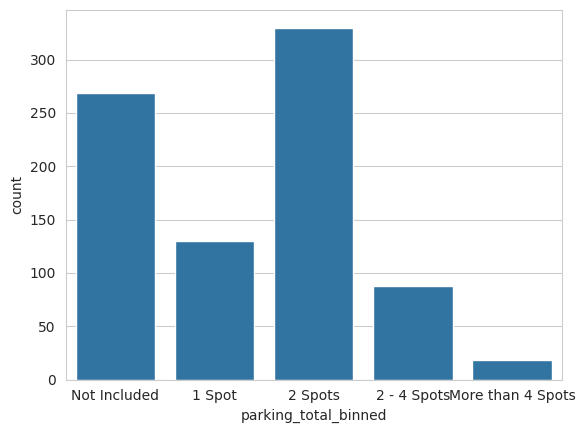

In [ ]:
sns.countplot(x='parking_total_binned', data=X_train)
plt.show()

In [ ]:
X_train['parking_total_binned'].count()

835

In [ ]:
X_train.drop('parking_total', axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 64 to 108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   state                 835 non-null    object  
 1   property_type         835 non-null    object  
 2   living_area           835 non-null    float64 
 3   bedrooms              835 non-null    int64   
 4   bathrooms_full        835 non-null    float64 
 5   bathrooms_partial     835 non-null    float64 
 6   architectural_style   835 non-null    object  
 7   basement_yn           835 non-null    float64 
 8   fireplace_yn          835 non-null    float64 
 9   fireplaces_total      835 non-null    float64 
 10  parking_garage        835 non-null    float64 
 11  pool_yn               835 non-null    float64 
 12  rooms_total           835 non-null    float64 
 13  null_count            835 non-null    int64   
 14  lot_size_binned       835 non-null    category
 15  parking_to

Since we upated this column, we will need to do the same for our `X_test` set.

In [ ]:
X_test['parking_total_binned'] = pd.cut(X_test['parking_total'], bins=bins, labels=labels)
X_test.drop('parking_total', axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 809 to 430
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   state                 93 non-null     object  
 1   property_type         93 non-null     object  
 2   living_area           93 non-null     float64 
 3   bedrooms              93 non-null     int64   
 4   bathrooms_full        93 non-null     float64 
 5   bathrooms_partial     93 non-null     float64 
 6   architectural_style   93 non-null     object  
 7   basement_yn           93 non-null     float64 
 8   fireplace_yn          93 non-null     float64 
 9   fireplaces_total      93 non-null     float64 
 10  parking_garage        93 non-null     float64 
 11  pool_yn               93 non-null     float64 
 12  rooms_total           93 non-null     float64 
 13  null_count            93 non-null     int64   
 14  lot_size_binned       93 non-null     category
 15  parking_to

### Pool Y/N

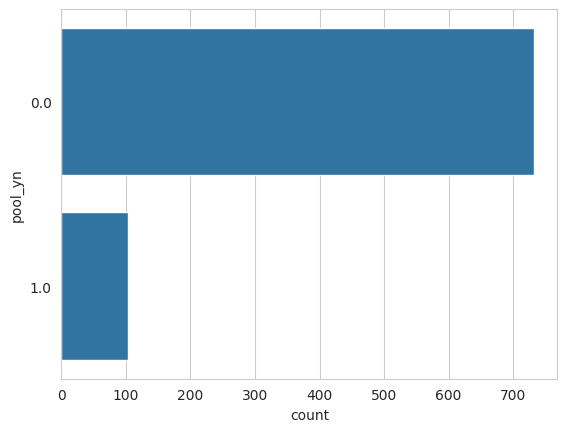

In [ ]:
sns.countplot(y='pool_yn', data=X_train)
plt.show()

In [ ]:
df['pool_yn'].value_counts()

,count
pool_yn,
0.0,813
1.0,115


### Rooms Total


Oh no! We have a big discrepancy with the amount of zero rooms showing for data.
- Since a property can't have zero rooms, this is where we would go back to the data annotator and inform of them this issue.
- We can also talk to other stakeholders at the company that would have some insight on how to handle this moving forward.

For the sake of the project, I will just input the mean for all of these zero values since the distribution looks relatively normal.

In [ ]:
room_imp = SimpleImputer(missing_values=0, strategy='mean')
room_imp = room_imp.fit_transform(X_train[['rooms_total']])
X_train['rooms_total'] = room_imp

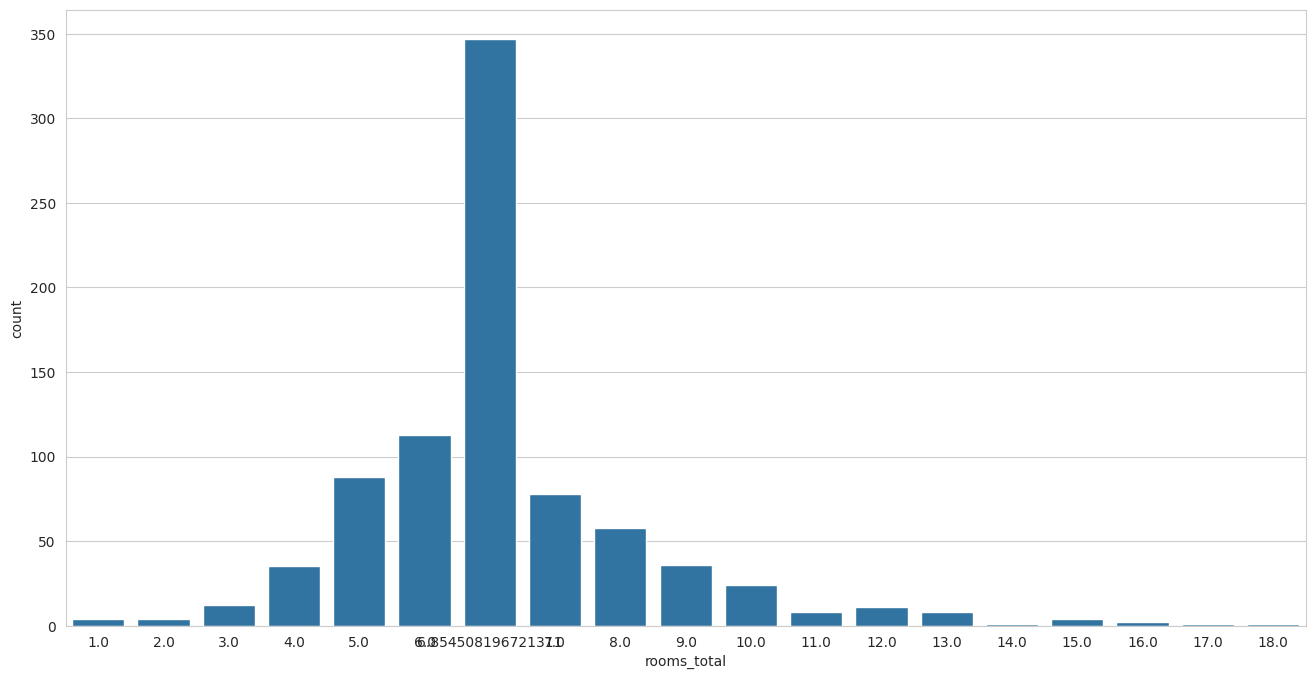

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='rooms_total', data=X_train)
plt.show()

Lets now bin this feature to make it slightly more normally distributed.

In [ ]:
bins = [0.0, 5.0, 6.0, 7.0, float('inf')]
labels = ['1-5 Rooms', '6 Rooms', '7 Rooms', 'More than 7 Rooms']

X_train['rooms_total_binned'] = pd.cut(X_train['rooms_total'], bins=bins, labels=labels)

print(X_train['rooms_total_binned'].value_counts())

rooms_total_binned
7 Rooms              425
More than 7 Rooms    154
1-5 Rooms            143
6 Rooms              113
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

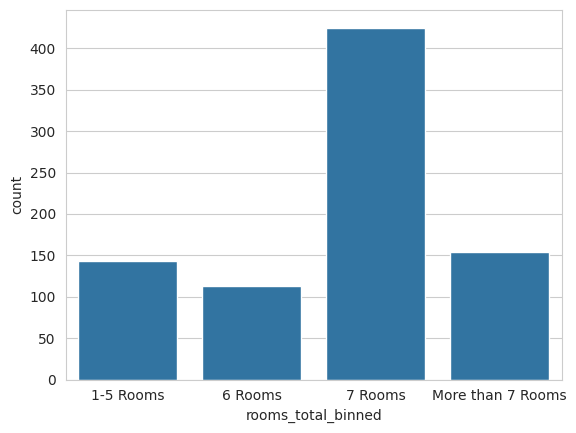

In [ ]:
sns.countplot(x='rooms_total_binned', data=X_train)
plt.show

In [ ]:
X_train.drop('rooms_total', axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 64 to 108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   state                 835 non-null    object  
 1   property_type         835 non-null    object  
 2   living_area           835 non-null    float64 
 3   bedrooms              835 non-null    int64   
 4   bathrooms_full        835 non-null    float64 
 5   bathrooms_partial     835 non-null    float64 
 6   architectural_style   835 non-null    object  
 7   basement_yn           835 non-null    float64 
 8   fireplace_yn          835 non-null    float64 
 9   fireplaces_total      835 non-null    float64 
 10  parking_garage        835 non-null    float64 
 11  pool_yn               835 non-null    float64 
 12  null_count            835 non-null    int64   
 13  lot_size_binned       835 non-null    category
 14  parking_total_binned  835 non-null    category
 15  rooms_tota

Same deal with our last column, updating it for our test set.

In [ ]:
X_test['rooms_total_binned'] = pd.cut(X_test['rooms_total'], bins=bins, labels=labels)
X_test.drop('rooms_total', axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 809 to 430
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   state                 93 non-null     object  
 1   property_type         93 non-null     object  
 2   living_area           93 non-null     float64 
 3   bedrooms              93 non-null     int64   
 4   bathrooms_full        93 non-null     float64 
 5   bathrooms_partial     93 non-null     float64 
 6   architectural_style   93 non-null     object  
 7   basement_yn           93 non-null     float64 
 8   fireplace_yn          93 non-null     float64 
 9   fireplaces_total      93 non-null     float64 
 10  parking_garage        93 non-null     float64 
 11  pool_yn               93 non-null     float64 
 12  null_count            93 non-null     int64   
 13  lot_size_binned       93 non-null     category
 14  parking_total_binned  93 non-null     category
 15  rooms_tota

## Correlation Analysis - Heatmap

Before we can create our Heatmap, we need to make sure that all of our columns are numeric.
- The columns we have to change are:
  - 'state', 'property_type', 'architectural_style', 'lot_size_binned', 'parking_total_binned', 'rooms_total_binned'

We also recognize that through our feature engineering process that `X_train` and `y_train` are not balanced in terms of rows.
- To meet this requirement, we will randomly remove rows from `X_train` to match rows from `y_train`.

In [ ]:
# Determine difference in counts
row_diff = X_train.shape[0] - y_train_logged.shape[0]
print(row_diff)

42


In [ ]:
import random

rows_to_remove = random.sample(range(X_train.shape[0]), row_diff)

In [ ]:
X_train = X_train.drop(X_train.index[rows_to_remove])
X_train = X_train.reset_index(drop=True)

In [ ]:
# Verifying that the two training sets match in row count
X_train.shape[0] == y_train_logged.shape[0]

True

In [ ]:
# Use target encoder for the high cardinality columns
# Use OrdinalEncoder and OneHotEncoder for the lesser ones

from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

te = TargetEncoder(target_type='continuous')
ohe = OneHotEncoder()

# Iterate over each column and apply TargetEncoder
for col in X_train[['state', 'property_type', 'architectural_style', 'parking_total_binned']]:
    X_train[col] = te.fit_transform(X_train[col].values.reshape(-1, 1), y_train_logged.ravel())

for col in X_train[['lot_size_binned', 'rooms_total_binned']]:
  X_train[col] = ohe.fit_transform(X_train[col].values.reshape(-1, 1)).toarray()

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 793 non-null    float64
 1   property_type         793 non-null    float64
 2   living_area           793 non-null    float64
 3   bedrooms              793 non-null    int64  
 4   bathrooms_full        793 non-null    float64
 5   bathrooms_partial     793 non-null    float64
 6   architectural_style   793 non-null    float64
 7   basement_yn           793 non-null    float64
 8   fireplace_yn          793 non-null    float64
 9   fireplaces_total      793 non-null    float64
 10  parking_garage        793 non-null    float64
 11  pool_yn               793 non-null    float64
 12  null_count            793 non-null    int64  
 13  lot_size_binned       793 non-null    float64
 14  parking_total_binned  793 non-null    float64
 15  rooms_total_binned    7

For evaluation purposes at the end of the project, we will need to implement these feature engineering techniques to our `X_test` set as well.

In [ ]:
# Iterate over each column and apply TargetEncoder
for col in X_test[['state', 'property_type', 'architectural_style', 'parking_total_binned']]:
    X_test[col] = te.fit_transform(X_test[col].values.reshape(-1, 1), y_test_logged.ravel())

for col in X_test[['lot_size_binned', 'rooms_total_binned']]:
  X_test[col] = ohe.fit_transform(X_test[col].values.reshape(-1, 1)).toarray()


Eliminating highly correlated features is an absolute necessity for many linear ML algorithms. The heatmap will show clearly which features are highly correlated.

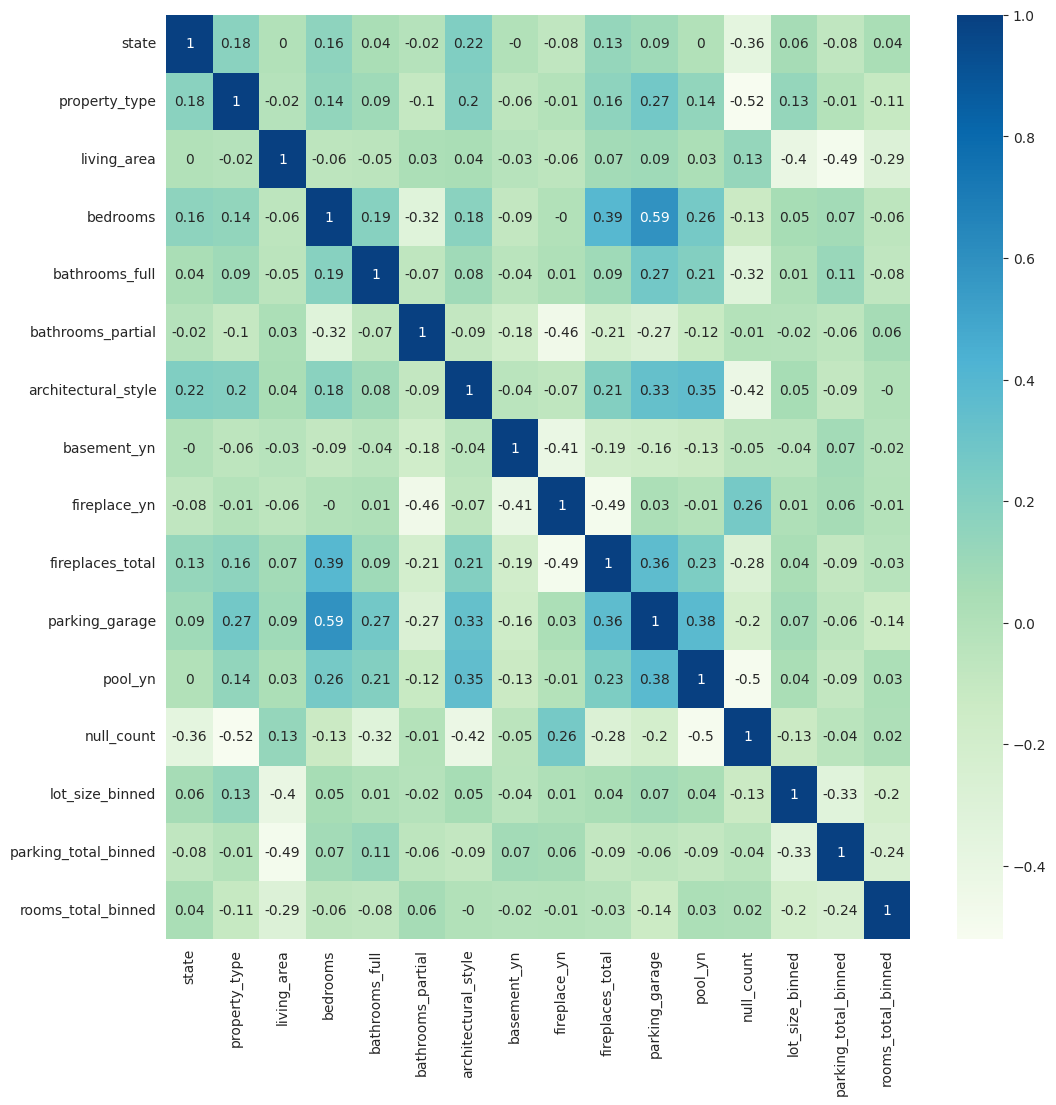

In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = X_train.select_dtypes(include=[np.number])

plt.figure(figsize = (12, 12))
corr_matrix = numeric_df.corr().round(2)  # Calculate correlation on numeric data
sns.heatmap(corr_matrix, cmap='GnBu', annot=True)
plt.show()

Hmmm, isn't that interesting?
- our `bedrooms` column and `parking_garage` column seem to have a higher than expected level of correlation
- we can observe these columns that need attending to so that we dont have the curse of multicollinearity (independent variables that will result in less reliable statistical inferences).

Lets show these two columns seperately in a scatterplot

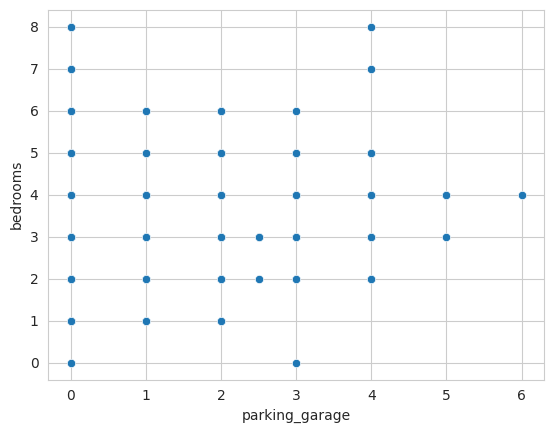

In [ ]:
sns.scatterplot(x='parking_garage', y='bedrooms', data=X_train)
plt.show()

Since the scatterplot doesn't give us a visualization of the correlation that well, lets turn to a chi-square test to further analyze correlation

In [ ]:
from scipy.stats import chi2_contingency

freq_table = pd.crosstab(X_train.parking_garage, X_train.bedrooms)
chi2, pval, dof, expected = chi2_contingency(freq_table)
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {pval}')
print(f'Degrees of Freedom: {dof}')

Chi-Square Statistic: 158.27728486012273
P-value: 1.0646228900825787e-11
Degrees of Freedom: 56


**Chi-Square Value (134.45):**
- This is quite a large value, which suggests there's a substantial difference between our observed data and what would be expected if there was no relationship between the variables being tested.

**P-value (2.12e-08):**
- This is an extremely small p-value (0.0000000212). In most research, we use a significance level ($α$) of 0.05 or 0.01. This p-value is much smaller than either of these thresholds.

**Degrees of Freedom (56):**
- This tells us about the complexity of our analysis. It represents the number of values that are free to vary in your calculation. The DF of 56 suggests this was a fairly complex analysis, possibly involving a large contingency table.

**Interpretation of Results:**

- There is very strong statistical evidence against the null hypothesis (which typically assumes no relationship between variables)
- With a p-value this small (2.12e-08), the chance of seeing these results by random chance is approximately 1 in 47 million
- Whatever relationship or difference we are testing for is almost certainly real and not due to random chance

However, the nature and strength of this association isn't captured by the chi-square test alone.
To further understand this relationship, we might consider:

1. Examining the contingency table to see patterns in the data.
2. Calculating effect size measures like Cramer's V to quantify the strength of the association.
3. Using visualization techniques to explore the relationship between these variables.

For this project, we will omit these follow-up tests since the model output does not need to be exact.
- we take the results of this chi-square test to mean that no action needs to be taken on these two columns

## Bivariate Analysis - Box Plot & Grouped Bar Chart


Next we will visualize the relationship with each variable to the target variable.

Note: Grouped bar chart can be used as the visual represenation of Chi-Square Analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_grid_histograms(X_train, y_train_logged, figsize=(20, 20)):
    """
    Creates a professional grid of histogram plots for each feature in X_train against y_train

    Parameters:
    X_train: DataFrame containing features
    y_train: Series containing target variable
    figsize: tuple specifying figure size (width, height)
    """
    # Set the style
    sns.set_style('whitegrid')

    # Custom color palette
    colors = sns.color_palette("husl", 8)

    # Calculate number of features and required grid dimensions
    n_features = len(X_train.columns)
    n_rows = int(np.ceil(np.sqrt(n_features)))
    n_cols = n_rows

    # Create figure and subplots with white background
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, facecolor='white')
    fig.suptitle('Feature Distributions by Target',
                fontsize=20,
                y=0.95,
                fontweight='bold',
                fontfamily='sans-serif')

    # Flatten axes array for easier iteration
    axes_flat = axes.flatten()

    # Create histograms for each feature
    for idx, column in enumerate(X_train.columns):
        if idx < n_features:
            # Create histogram with enhanced styling
            sns.histplot(
                data=X_train,
                x=column,
                y=y_train_logged,
                ax=axes_flat[idx],
                palette=colors,
                alpha=0.7,  # Slight transparency
                bins=20
            )

            # Enhance subplot styling
            axes_flat[idx].set_title(f'{column}',
                                   fontsize=12,
                                   fontweight='bold',
                                   pad=10,
                                   fontfamily='sans-serif')

            # Style the grid
            axes_flat[idx].grid(True, linestyle='--', alpha=0.7)

            # Style the spines
            for spine in axes_flat[idx].spines.values():
                spine.set_edgecolor('#444444')
                spine.set_linewidth(0.5)

            # Style the labels
            axes_flat[idx].tick_params(axis='both', labelsize=10)
            axes_flat[idx].set_xlabel(column,
                                    fontsize=11,
                                    fontweight='bold',
                                    fontfamily='sans-serif')
            axes_flat[idx].set_ylabel('Target',
                                    fontsize=11,
                                    fontweight='bold',
                                    fontfamily='sans-serif')

            # Rotate x-axis labels if they're too long
            if len(str(column)) > 10:
                axes_flat[idx].tick_params(axis='x', rotation=45)
        else:
            axes_flat[idx].set_visible(False)

    # Add a subtle background color to the figure
    fig.patch.set_facecolor('#f8f9fa')

    # Add a descriptive text box with summary statistics
    fig.text(0.02, 0.02,
             f'Total Features: {n_features}\nSample Size: {len(X_train)}',
             fontsize=10,
             fontfamily='sans-serif',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Adjust layout to prevent overlap
    plt.tight_layout()

    return fig, axes

# Example usage with custom style settings:
def plot_feature_distributions(X_train, y_train_logged, figsize=(20, 20)):
    """
    Wrapper function to set up the style and create the plots
    """
    # Set up the style context
    sns.set_style('whitegrid')
        # Create the visualization
    fig, axes = create_grid_histograms(X_train, y_train_logged, figsize=figsize)

        # Add more breathing room between subplots
    plt.subplots_adjust(hspace=0.35, wspace=0.3)
    plt.show()
    return fig, axes

# Usage:
# fig, axes = plot_feature_distributions(X_train, y_train)

<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-216-dfddd7fa94c2>:40: UserWarning: Ignoring `palette` because no `hue` vari

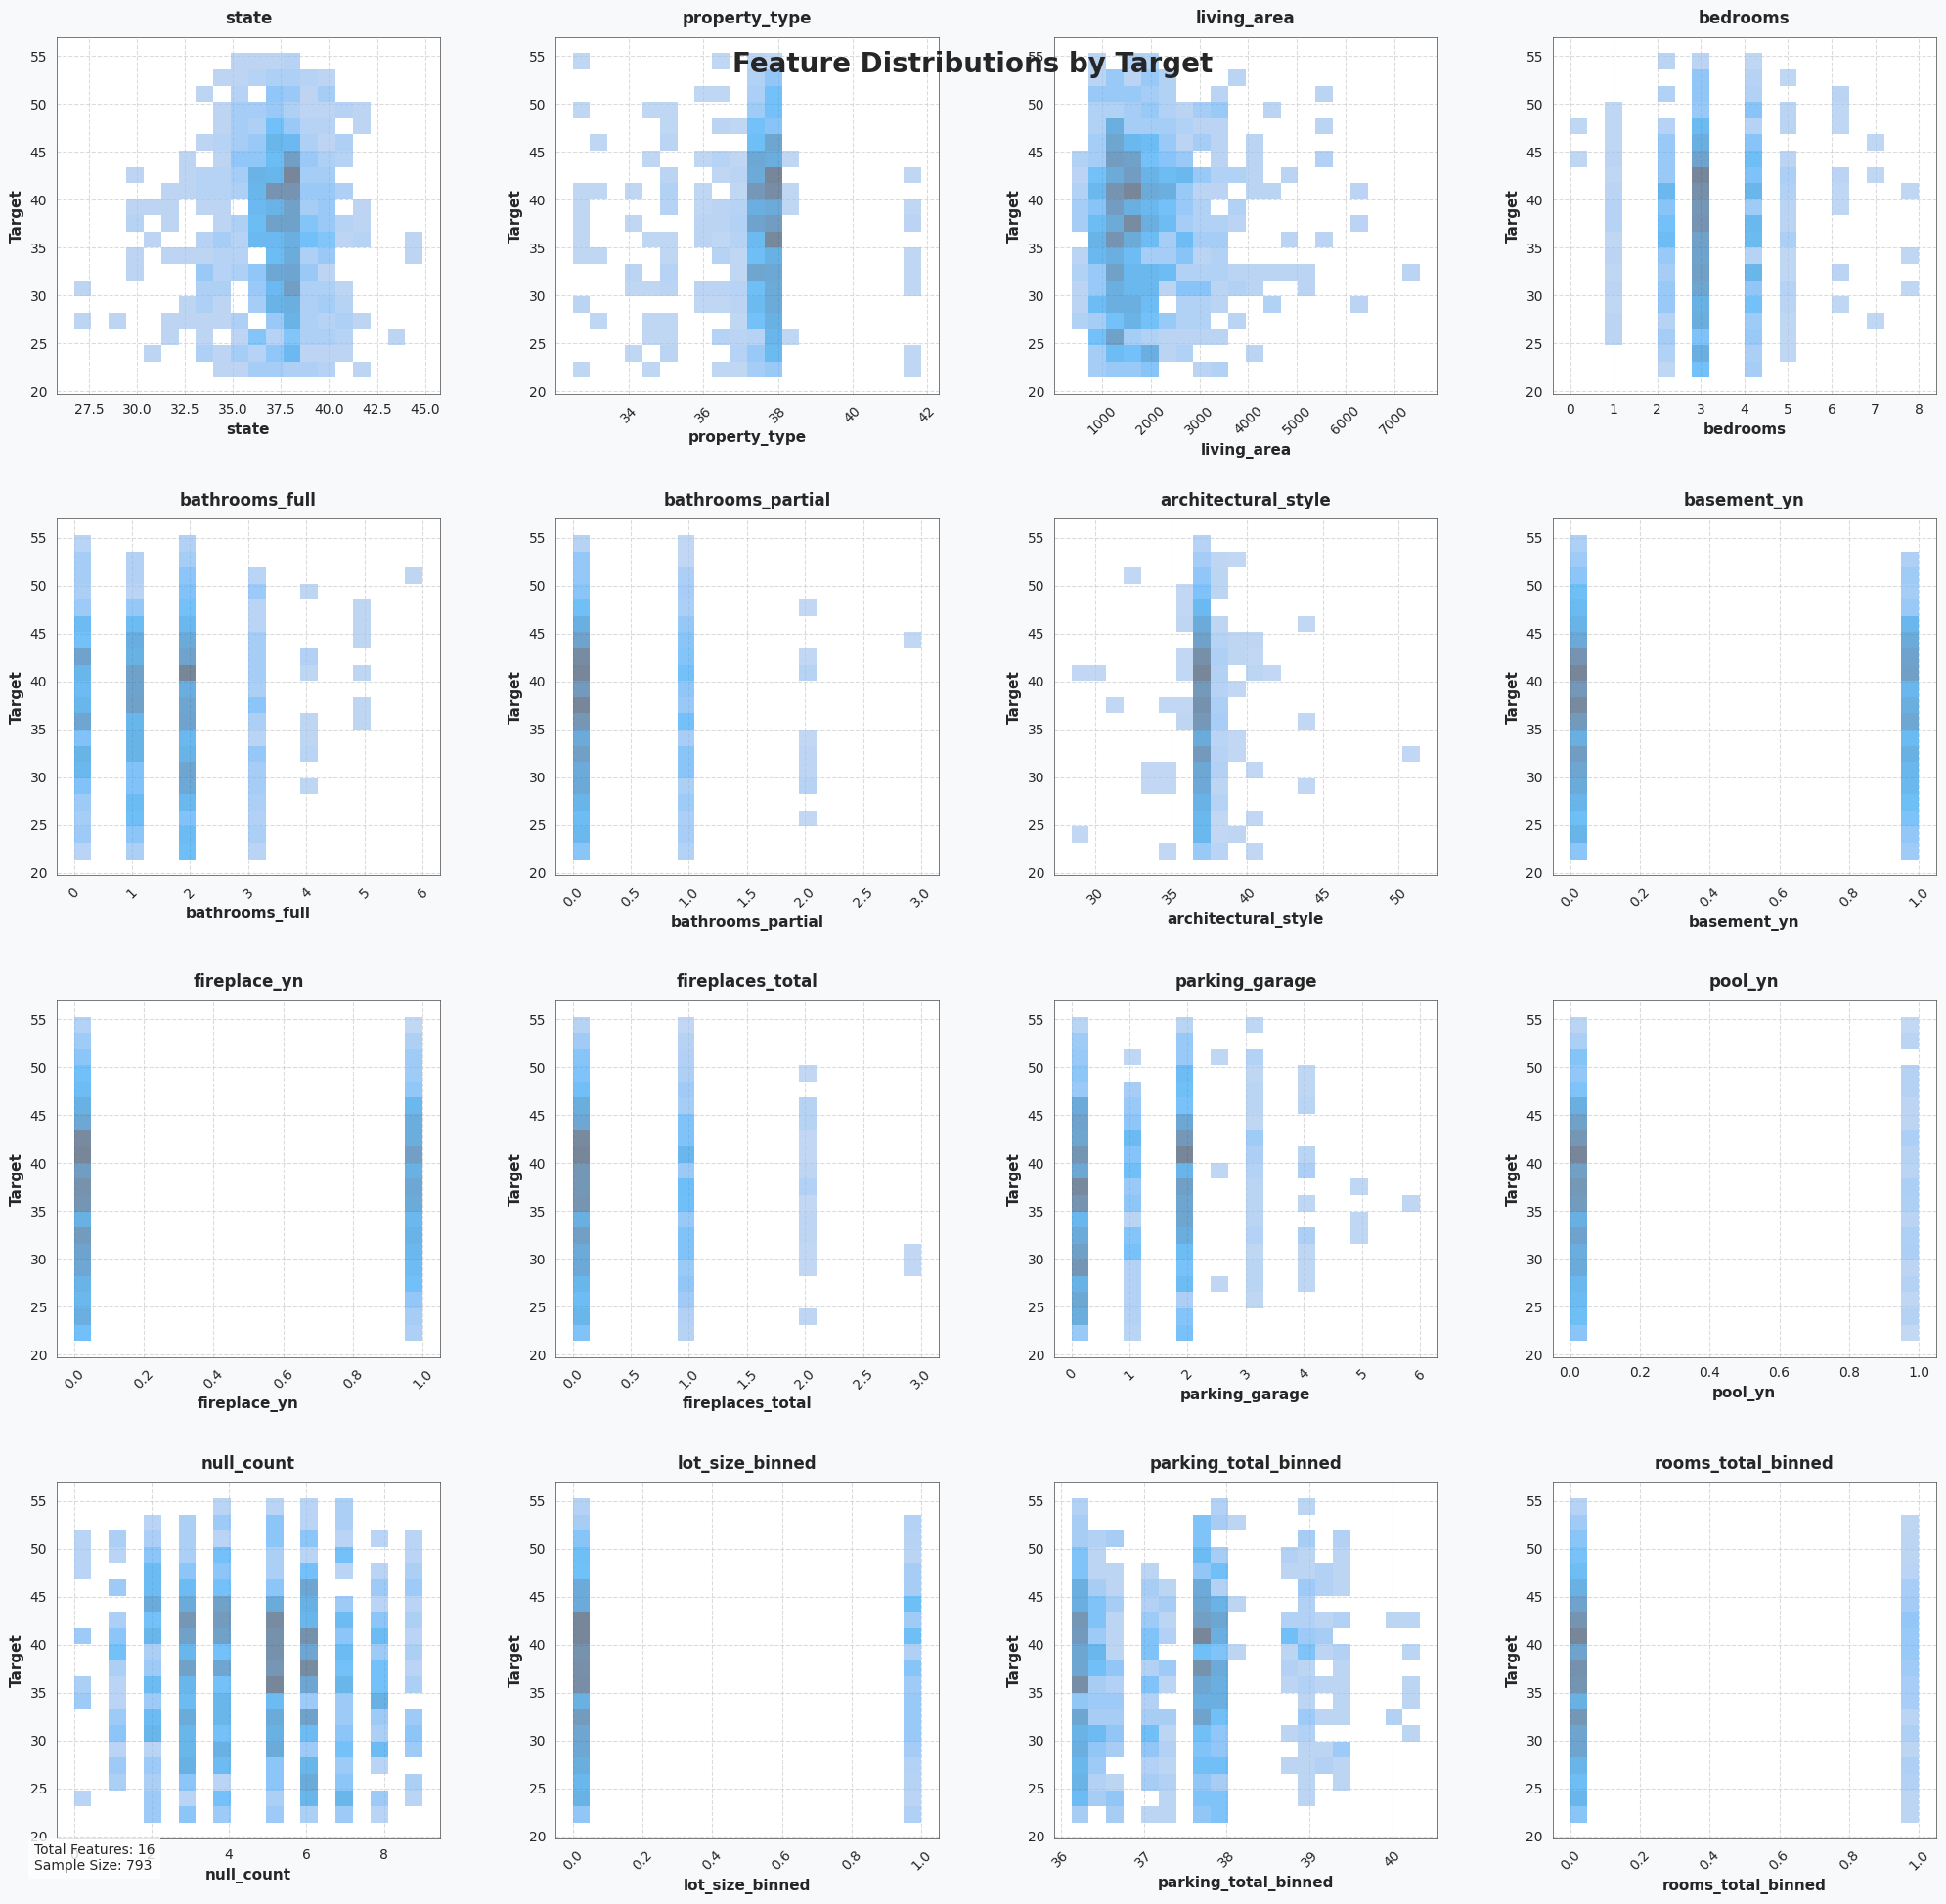

In [ ]:
fig, axes = plot_feature_distributions(X_train, y_train_logged.ravel())

Nothing is really standing out in terms of fixing, so at this point in the project our features only need to be scaled. Afterwards, they will be ready for model input.

# Feature Engineering


Even though we have already done a lot of the Feature Engineering already, I still put this category here as its part of the general flow of a ML Project.
- The process is iterative and can force us to revisit certain aspects from earlier which happened for me also

The last bit of Feature Engineering I did was to implement Feature Scaling in a pipeline form.

## Feature Scaling

As a general best practice we now scale our features after our train/valid/test split, we do this for several reasons:

1. Prevent Data Leakage:

  - Scaling before splitting can lead to information leakage from your test set into your training set.
  - The scaler computes statistics (min and max for MinMaxScaler) from the entire dataset. If you scale before splitting, your model would indirectly have information about the test set during training.


2. Realistic Model Evaluation:

  - In a real-world scenario, you won't have access to the statistics of future (unseen) data.
  - Scaling after splitting better simulates this scenario, providing a more realistic evaluation of your model's performance.


3. Consistency in Production:

  - When deploying your model, you'll need to scale new, unseen data.
  - By fitting the scaler only on the training data, you ensure consistency between your model evaluation and its real-world application.



The correct process should be:

1. Split your data into train, validation, and test sets.
2. Fit the scaler on the training data only.
3. Transform the training data using this fitted scaler.
4. Use the same fitted scaler to transform your validation and test sets.

To validate our model, we will split our training dataset to allow for a validaton (holdout) set that will allow us to run our metrics onto.

In [ ]:
from sklearn.model_selection import train_test_split


# Split the data further into 80% training and 10% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train_logged, test_size=0.11, random_state=42
)

print(f'X_train: {X_train.shape}')
print(f'X_valid: {X_valid.shape}\n ')

print(f'y_train: {y_train.shape}')
print(f'y_valid: {y_valid.shape}')

X_train: (705, 16)
X_valid: (88, 16)
 
y_train: (705, 1)
y_valid: (88, 1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

df_transformer = Pipeline(steps=[
    ('rescale', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers =[
        ('df_transformer', df_transformer, X_train.columns)],
        verbose_feature_names_out=True

)
preprocessor

ColumnTransformer(transformers=[('df_transformer',
                                 Pipeline(steps=[('rescale',
                                                  StandardScaler())]),
                                 Index(['state', 'property_type', 'living_area', 'bedrooms', 'bathrooms_full',
       'bathrooms_partial', 'architectural_style', 'basement_yn',
       'fireplace_yn', 'fireplaces_total', 'parking_garage', 'pool_yn',
       'null_count', 'lot_size_binned', 'parking_total_binned',
       'rooms_total_binned'],
      dtype='object'))])

In [ ]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_valid_scaled = preprocessor.fit_transform(X_valid)

## Feature Importance

We will input Feature Importance into the project to increase interpretability should our stakeholders ask for that information.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: >

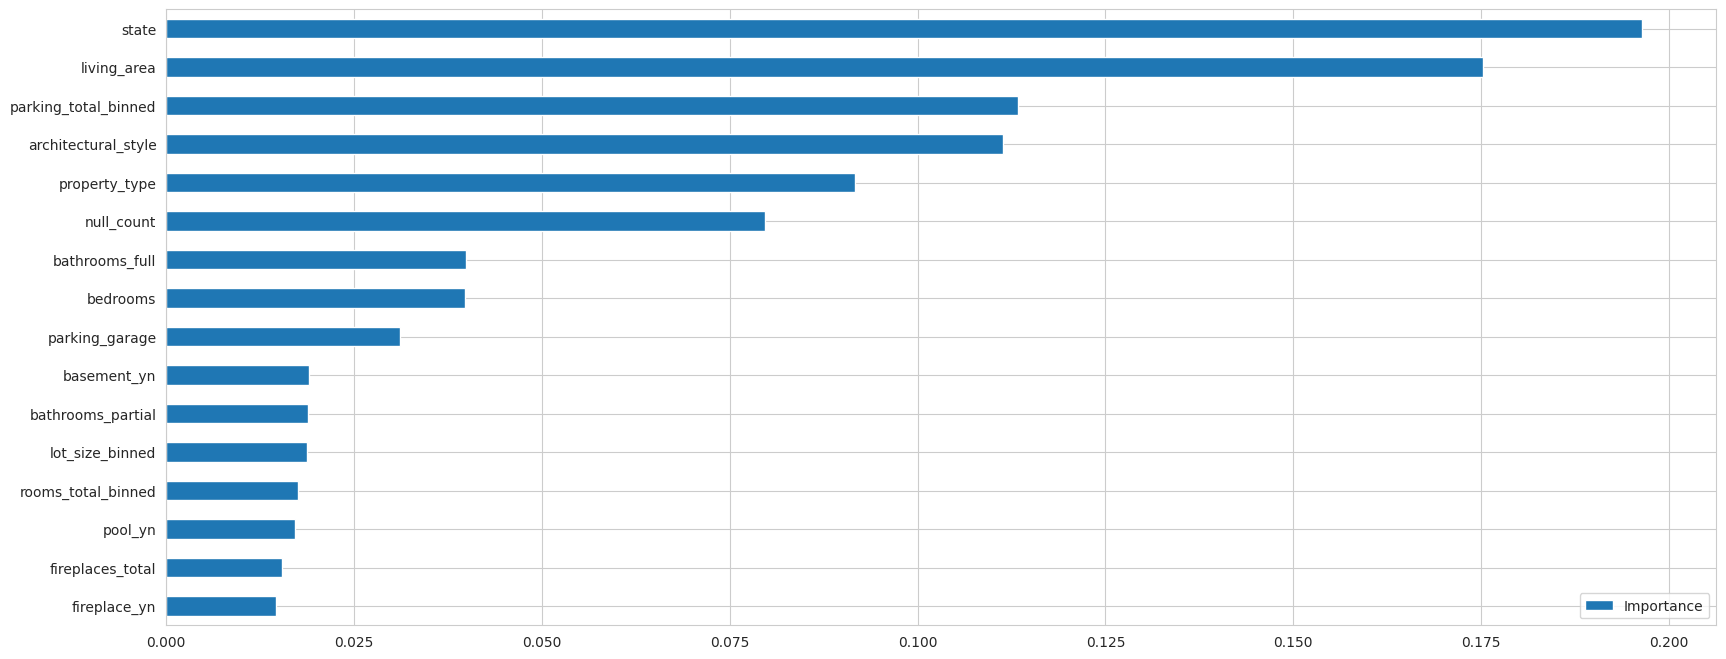

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest to gain an insight on Feature Importance
clf = RandomForestRegressor()
clf.fit(X_train_scaled, y_train)

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index = X_train.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20, len(importance)/2))


#  Model Training

## Model Selection & Implementation

Now we will iterate through several models to find the one that fits our dataset the best, these include:

- Linear Regression
- Elastic Net
- DecisionTreeRegressor
- RandomForestRegressor
- XGBoost
- Support Vector Machines (SVM) - LinearSVR
- GradientBoostingRegressor
- BaggingRegressor
- GaussianProcessRegressor
- KNeighborsRegressor
- SGDRegressor
- HuberRegressor

Cross-validation is a useful technique in ML that you might want to use in several scenarios:

1. Model evaluation: When you want to get a more robust estimate of your model's performance, especially with limited data. It helps prevent overfitting to a single train-test split.
2. Comparing models: When you're trying to choose between different models or hyperparameters, cross-validation can give you a more reliable comparison.
3. Small datasets: When your dataset is relatively small, cross-validation allows you to make better use of your limited data for both training and evaluation.
4. Detecting overfitting: Cross-validation can help you identify if your model is overfitting by comparing its performance across different subsets of your data.
5. Hyperparameter tuning: When you're using techniques like grid search to find the best hyperparameters, cross-validation can provide a more stable performance metric.
6. Time series data: For time series problems, you might use time series cross-validation to evaluate your model's performance over different time periods.
7. Assessing model stability: Cross-validation can help you understand how sensitive your model is to the specific data it's trained on.

In [ ]:
#pip install xgboost

In [ ]:
#pip install neptune

In [ ]:
# Model Imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor

> Adding a function to evaluate the model as we go along using these metrics:
1. Mean Absolute Error
  - This measures the average absolute difference between predicted and actual values. Lower is better.
2. Root Mean Square Log Error
  - This measures the ratio between predicted and actual values. Lower is better.
3. R^2 score
  - This measures the proportion of variance in the dependent variable explained by the model. This usually ranges between 0 and 1, with 1 being perfect prediction. Negative values indicate the model performs worse than a horizontal line.

In [ ]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

def rmsle(y_test, y_pred):
  y_pred = np.clip(y_pred, a_min=1e-6, a_max=None)
  return np.sqrt(mean_squared_log_error(y_test, y_pred))

def show_scores(model):
  train_pred = model.predict(X_train_scaled)
  val_pred = model.predict(X_valid_scaled)
  scores = {'Training MAE': round(mean_absolute_error(y_train, train_pred), 3),
            'Valid MAE': round(mean_absolute_error(y_valid, val_pred), 3),
            'Training RMSLE': round(rmsle(y_train, train_pred), 3),
            'Valid RMSLE': round(rmsle(y_valid, val_pred), 3),
            'Training R^2': round(model.score(X_train_scaled, y_train), 3),
            'Valid R^2': round(model.score(X_valid_scaled, y_valid), 3),
            'Training MAPE': round(mean_absolute_percentage_error(y_train, train_pred), 3),
            'Valid MAPE': round(mean_absolute_percentage_error(y_valid, val_pred), 3)
  }
  return scores

## Model Baseline - Linear Regression

We will use a classic Linear Regression model for our sanity check before experimentation.
- if our other chosen models do worse than our baseline, it can tell us many things
- We would either conclude the simplest approach is the best in our case in terms of compute speed & accuracy, or possibly that we need to go back to previous steps in the project to increase model performance.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
show_scores(lr)

{'Training MAE': 6.235,
 'Valid MAE': 6.226,
 'Training RMSLE': 0.205,
 'Valid RMSLE': 0.22,
 'Training R^2': 0.029,
 'Valid R^2': -0.052,
 'Training MAPE': 0.181,
 'Valid MAPE': 0.191}

## Implementing Model Versioning

Now we will start the ever fun part of experimenting with different models. This is the part of the ML project that tends to be the most fun. However, we have to be cognizant of the whirlpool we can get ourselves into.
- We will have to balance the tradeoff between improving our model and how much value that improvement will cost relative to time.

For this project, I decided to challenge myself to use Neptune for model versioning instead of the ever popular MLflow. The only reason for this is that I started to research other ML versioning options and thought it would be cool to check out.
- I made a list of several scikit-learn models and the classic XGBoost algorithm for experimentation.

To start off, lets log into our Neptune account, create a project, and link it up to our notebook.

In [ ]:
import neptune

workspace = 'no.robbins'
project_name = 'House-Canary-Dream-Home-App'
project = f'{workspace}/{project_name}'
print(project)

no.robbins/House-Canary-Dream-Home-App


# API

Instead of creating a hundred code cells in notebook, I challenged myself to create a function that would run through all of the model training in one go. This took many iterations for me to get right but I was happy with the result.
- I also included cross validation in with each model since our dataset is so small. This way our results were more accurate than that if we had just done one run for each.
- Depending on the need of our stakeholders, we could always expand on this process to increase accuracy of the model. Now that the function is created, it could be as simple to change one line of code if need be.

For simplicities sake, we include 11 models with a CV fold of 5 run-throughs for each.
- all of the metrics and model iterations were sent to Neptune for easy cataloging and versioning

In [ ]:
from sklearn.model_selection import cross_validate

def log_model_experiments(models,
                          X_train_scaled,
                          X_valid_scaled,
                          y_train,
                          y_valid,
                          neptune_project):
  """
  Run and Log Cross-Validate experiments for multiple models

  Arguments:
    models(dict): Dictionary of model name to model object
    X_train_scaled(array): Scaled Training features
    X_valid_scaled (array): Scaled Valid features
    y_train (array): Training target values
    y_valid (array): Valid Target values
    neptune_project (str): Neptune Project Name
  """
  results = []

  for model_name, model in models.items():
    # Initialize Neptune run for each model
    run = neptune.init_run(
        project=neptune_project,
        api_token=NEPTUNE_API_TOKEN,
        dependencies='infer',
        capture_hardware_metrics=True,
        capture_stderr=True,
        capture_stdout=True,
        name=f'run_{model_name}',
        tags=[model_name, 'cross-validation']
    )

    try:
      # Fit the model
      model.fit(X_train_scaled, y_train)

      # Calculate and log metrics for each CV fold
      for i in range(5):
        metrics = show_scores(model)

        # Create result dictionary for each iteration
        iteration_result = {
            'Iteration': i + 1,
            'Model': model_name,
            'Metrics': metrics
        }
        results.append(iteration_result)

        # Log Metrics to Neptune for this iteration
        for metric_name, metric_value in metrics.items():
          run[f'iterations/iteration_{i+1}/{metric_name}'] = metric_value

      # Log final Model metrics
      final_metrics = show_scores(model)
      for metric_name, metric_value in final_metrics.items():
        run[f'metrics/final_{metric_name}'] = metric_value

      # Log Model Parameters
      run['parameters/model'] = str(model)
      run['parameters/model_name'] = model_name

    finally:
      # always stop the run, even if theres an error
      run.stop()

  # Create a Dataframe with all results
  return pd.DataFrame(results)

Now that we have our function set up, I include a dictionary of models and their hyperparameters.
- These hyperparameters were chosen by me at random. If need be, we can also go in and change any of these hyperparameters to increase model accuracy. We can use random search, grid search, or the increasingly popular Bayesian Opitmization method.
- I chose not to for our case because the focus of the project is to show data analytics and productionizing the ML Model.

In [ ]:
models = {
      'Elastic Net': ElasticNet(
          l1_ratio = 0.5,
          random_state=42
      ),
      'Decision Tree Regressor': DecisionTreeRegressor(
          criterion='absolute_error',
          max_depth=5,
          min_samples_split=2,
          random_state=42
      ),
      'Random Forest Regressor': RandomForestRegressor(
          n_estimators=150,
          criterion='absolute_error',
          max_depth=6,
          random_state=42
      ),
      'XGBoost': XGBRegressor(
          n_estimators=100,
          max_depth=7,
          eta=0.1,
          subsample=0.7,
          colsample_bytree=0.8,
          random_state=42
      ),
      'LinearSVR': LinearSVR(
          max_iter=150,
          random_state=42
      ),
      'Gradient Boosting Regressor': GradientBoostingRegressor(
          loss='squared_error',
          learning_rate=0.01,
          n_estimators=200,
          subsample=0.5,
          criterion='squared_error',
          random_state=42
      ),
      'Bagging Regressor': BaggingRegressor(
          n_estimators=100,
          max_samples=10,
          random_state=42
      ),
      'Gaussian Process Regressor': GaussianProcessRegressor(
          normalize_y=True,
          random_state=42
      ),
      'K Neighbors Regressor': KNeighborsRegressor(
          n_neighbors=10,
          n_jobs=-1
      ),
      'SGD Regressor': SGDRegressor(
          penalty='l1',
          fit_intercept=False,
          max_iter=200,
          learning_rate='invscaling',
          random_state=42
      ),
      'Huber Regressor': HuberRegressor(
          max_iter=200,
          epsilon=1,
          alpha=0.1
      )
  }

Now we have everything set up to run our experiment and set it up in such a way as to easily change it if need be in the future.
- so lets input all of our arguments in the function and RUN IT!

In [ ]:
# Run experiments
results_df = log_model_experiments(
    models,
    X_train_scaled,
    X_valid_scaled,
    y_train,
    y_valid,
    neptune_project=project
)

print(results_df)

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-22
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 68 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 68 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-22/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-23
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 57 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 57 operations synced, thanks for waiting!
[neptune] [info   ] Explore the me

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 58 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 58 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-24/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-25
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 68 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 68 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-25/metadata
[neptune] [info   ] Ne

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 69 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 69 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-26/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-27


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 58 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 58 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-27/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-28


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 58 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 58 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-28/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-29
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 57 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 57 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-29/metadata
[neptune] [info   ] Ne

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 69 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 69 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-31/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-32
[neptune] [info   ] Shutting down background jobs, please wait a moment...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 69 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 69 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-32/metadata
    Iteration                        Model  \
0           1                  Elastic Net   
1           2                  Elastic Net   
2           3                  Elastic Net   
3           4                  Elastic Net   
4           5                  Elastic Net   
5           1      Decision Tree Regressor   
6           2      Decision Tree Regressor   
7           3      Decision Tree Regressor   
8           4      Decision Tree Regressor   
9           5      Decision Tree Regressor   
10          1      Random Forest Regressor   
11          2      Random Forest Regressor   
12          3      Random Forest Regressor   
13     

Training time didnt take very long and our notebook output our DataFrame for us to check out.
- To do this, we will continue to use Neptune to analyze and display our results.

In [ ]:
def analyze_and_display_results(results_df, neptune_project):
  """
  Analyze results and create visualization in Neptune
  """
  run = neptune.init_run(
      project=neptune_project,
      api_token=NEPTUNE_API_TOKEN,
      name='model_comparison_analysis'
  )

  try:
    # Extract metrics from the 'Metrics' column
    metric_columns = pd.json_normalize(results_df['Metrics'].tolist())

    # Combine with original DataFrame
    analysis_df = pd.concat([
        results_df[['Model', 'Iteration']],
        metric_columns
    ], axis = 1)

    # Calculate mean scores for each model
    model_means = analysis_df.groupby('Model').mean(numeric_only=True)
    model_stds = analysis_df.groupby('Model').std(numeric_only=True)

    # Create summary tables for validation metrics
    valid_metrics = ['Valid MAE', 'Valid RMSLE', 'Valid R^2', 'Valid MAPE']

    for metric in valid_metrics:
      summary = pd.DataFrame({
          'Mean Score': model_means[metric],
          'Std Dev': model_stds[metric]
      }).sort_values('Mean Score', ascending=False if 'R^2' in metric else True)

      # Log to Neptune
      run[f'model_comparison/{metric}/best_model'] = summary.index[0]
      run[f'model_comparison/{metric}/best_score'] = summary['Mean Score'].iloc[0]

      # Create formatted table
      table_data = summary.round(4).reset_index()
      table_data['Mean += Std'] = table_data.apply(
          lambda x: f"{x['Mean Score']:.4f} += {x['Std Dev']:.4f}", axis=1
      )

      # Log table to Neptune
      run[f'model_comparison/{metric}/rankings'].upload(
          neptune.types.File.as_html(table_data[['Model', 'Mean += Std']])
      )
    # Calculate overall ranking based on validation metrics
    normalized_scores = pd.DataFrame()
    for metric in valid_metrics:
      scores = model_means[metric]
      if 'R^2' in metric:
        # The higher the R^2 the better
        normalized_scores[metric] = (scores - scores.min()) / (scores.max() - scores.min())
      else:
        # For error metrics, lower is better
        normalized_scores[metric] = 1 - (scores.min()) / (scores.max() - scores.min())

    overall_scores = normalized_scores.mean(axis=1).sort_values(ascending=False)
    overall_ranking = pd.DataFrame({
        'Overall Score': overall_scores,
        'Rank': range(1, len(overall_scores) + 1)
    })

    # Log Overall Ranking
    run['model_comparison/overall/best_model'] = overall_ranking.index[0]
    run['model_comparison/overall/rankings'].upload(
        neptune.types.File.as_html(overall_ranking.round(4))
    )
    return model_means, model_stds, overall_ranking
  finally:
    run.stop()

What this function is doing at a fundamental level is taking all 4 of our metrics and combining them into one rank. I thought this would be a great way to put all the pros and cons of each model together to pick the best one in this case.

Since our app will not suffer from any false negative or false positive predictions too much, the normalized summary ranking metric is the one we will take.
- If we go back to our stakeholders and discuss with them that for instance we want to limit false negative predictions, so the consumer doesn't get upset with being shown a lower price than asking price, we can update the ranking metrics accordingly.

In [ ]:
# Analyze Results
model_means, model_stds, overall_ranking = analyze_and_display_results(
    results_df,
    neptune_project=project
)

# Print Overall Ranking
print('\nOverall Model Ranking:')
print('-' * 40)
for model in overall_ranking.index:
  score = overall_ranking.loc[model, 'Overall Score']
  rank = overall_ranking.loc[model, 'Rank']
  print(f'{rank:2d}. {model:15} (Score: {score:.4f})')

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-33
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 14 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 14 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/no.robbins/House-Canary-Dream-Home-App/e/HOUS-33/metadata

Overall Model Ranking:
----------------------------------------
 1. Decision Tree Regressor (Score: 0.8890)
 2. Random Forest Regressor (Score: 0.8889)
 3. XGBoost         (Score: 0.8885)
 4. Gradient Boosting Regressor (Score: 0.8884)
 5. Bagging Regressor (Score: 0.8883)
 6. LinearSVR       (Score: 0.8878)
 7. Elastic Net     (Score: 0.8878)
 8. Huber Regressor (Score: 0.8875)
 9. K Neighbors Regressor (Score: 0.8862)
10. Gaussian Process 

After all of these experiments, we can see that the Decision Tree Regressor model is our top dog.

## Hyperparameter Tuning

Before we evaluate the model, lets do a quick hyperparameter tuning on our Decision Tree Regressor model.
- we will use Bayesian Optimization to implement the tuning

In [ ]:
#pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV

model = DecisionTreeRegressor()

param_grid = {
    'max_depth': (2, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': ('sqrt', 'log2', None),
    'criterion': ('friedman_mse', 'squared_error', 'absolute_error')
}

optimizer = BayesSearchCV(
    estimator=model,
    search_spaces=param_grid,
    cv=5,
    n_iter=100
)

optimizer.fit(X_train_scaled, y_train)
print(optimizer.best_params_)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['friedman_mse', 2, 'log2', 10, 2] before, using random point ['absolute_error', 2, None, 7, 6]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['friedman_mse', 2, 'log2', 10, 2] before, using random point ['squared_error', 4, None, 2, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['friedman_mse', 2, 'log2', 6, 10] before, using random point ['squared_error', 7, 'log2', 5, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['squared_error', 2, 'log2', 1, 2] before, using random point ['squared_error', 10, 'sqrt', 2, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist

OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 2), ('max_features', 'log2'), ('min_samples_leaf', 10), ('min_samples_split', 2)])


In [ ]:
best_model = optimizer.best_estimator_
print(best_model)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      max_features='log2', min_samples_leaf=3,
                      min_samples_split=20)


Now that we have the ideal hyperparameters, lets run a final test on the testing data to lock in our model.

## LEFT OFF Model Evaluation

Now that we have tested our model and chosen the best one for our use case, lets evaluate it on the test data to confirm that its the right one for the job.
- In a perfect world we would only use this testing data once. However, since we did a good job of limiting data leakage, we will use the test data for evaluation and then also for input in our finished app.
- Let's be clear, IF WE HAD MORE DATA I WOULD NOT DO THIS. For the sake of the project only having 1,000 data entries it is the best tradeoff to show how to evaluate the model properly and how to send results into the app when its ready for deployment.

In [ ]:
def prepare_and_evaluate_model(model, X_train, X_test, y_train, y_test, scaler=None):
    """
    Prepare data and evaluate model while preventing data leakage

    Args:
        model: Fitted model
        X_train: Original training features (unscaled)
        X_test: Original test features (unscaled)
        y_train: Training target
        y_test: Test target
        scaler: Preprocessor pipeline of features
    """

    scaler = preprocessor

    # Transform train/test data using the scaler fitted previously on training data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Get predictions
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    metrics = {
        'Training MAE': mean_absolute_error(y_train, train_pred),
        'Test MAE': mean_absolute_error(y_test, test_pred),
        'Training RMSLE': rmsle(y_train, train_pred),
        'Test RMSLE': rmsle(y_test, test_pred),
        'Training R^2': model.score(X_train_scaled, y_train),
        'Test R^2': model.score(X_test_scaled, y_test),
        'Training MAPE': mean_absolute_percentage_error(y_train, train_pred),
        'Test MAPE': mean_absolute_percentage_error(y_test, test_pred)
    }

    return metrics, train_pred, test_pred, scaler

def plot_model_evaluation_no_leakage(model, X_train, X_test, y_train, y_test, scaler=None):
    """
    Create comprehensive visualization of model performance without data leakage
    """
    # Prepare data and get predictions
    metrics, train_pred, test_pred, scaler = prepare_and_evaluate_model(
        model, X_train, X_test, y_train, y_test, scaler
    )

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))

    # 1. Actual vs Predicted Plot
    ax1 = plt.subplot(2, 2, 1)
    plt.scatter(y_train, train_pred, alpha=0.5, label='Training', color='blue')
    plt.scatter(y_test, test_pred, alpha=0.5, label='Test', color='red')

    # Add perfect prediction line
    min_val = min(min(y_train), min(y_test))
    max_val = max(max(y_train), max(y_test))
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label='Perfect Prediction')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()

    # 2. Residuals Plot
    ax2 = plt.subplot(2, 2, 2)
    train_residuals = train_pred - y_train
    test_residuals = test_pred - y_test

    plt.scatter(train_pred, train_residuals, alpha=0.5, label='Training', color='blue')
    plt.scatter(test_pred, test_residuals, alpha=0.5, label='Test', color='red')
    plt.axhline(y=0, color='gray', linestyle='--')

    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.legend()

    # 3. Metrics Comparison
    ax3 = plt.subplot(2, 2, 3)
    metrics_df = pd.DataFrame({
        'Training': [metrics['Training MAE'], metrics['Training RMSLE'],
                    metrics['Training R^2'], metrics['Training MAPE']],
        'Test': [metrics['Test MAE'], metrics['Test RMSLE'],
                metrics['Test R^2'], metrics['Test MAPE']]
    }, index=['MAE', 'RMSLE', 'R^2', 'MAPE'])

    metrics_df.plot(kind='bar', ax=ax3)
    plt.title('Metrics Comparison')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

    # 4. Residuals Distribution
    ax4 = plt.subplot(2, 2, 4)
    sns.kdeplot(data=train_residuals, label='Training Residuals', color='blue')
    sns.kdeplot(data=test_residuals, label='Test Residuals', color='red')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.title('Residuals Distribution')
    plt.xlabel('Residual Value')
    plt.ylabel('Density')
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Print metrics
    print("\nModel Performance Metrics:")
    print("-" * 40)
    for metric, value in metrics.items():
        print(f"{metric:15}: {value:.4f}")

    return fig, metrics, scaler

# Example usage:
"""
# First time training and evaluating
model = DecisionTreeRegressor()  # Your best model
scaler = StandardScaler()

# Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Train model
model.fit(X_train_scaled, y_train)

# Create visualizations with original unscaled data
fig, metrics, scaler = plot_model_evaluation_no_leakage(
    model,
    X_train,  # Original unscaled data
    X_test,   # Original unscaled data
    y_train,
    y_test,
    scaler    # Pass the fitted scaler
)

# Display the plot
plt.show()

# The scaler can now be saved for future use if needed
"""

'\n# First time training and evaluating\nmodel = DecisionTreeRegressor()  # Your best model\nscaler = StandardScaler()\n\n# Fit scaler on training data only\nX_train_scaled = scaler.fit_transform(X_train)\n\n# Train model\nmodel.fit(X_train_scaled, y_train)\n\n# Create visualizations with original unscaled data\nfig, metrics, scaler = plot_model_evaluation_no_leakage(\n    model,\n    X_train,  # Original unscaled data\n    X_test,   # Original unscaled data\n    y_train,\n    y_test,\n    scaler    # Pass the fitted scaler\n)\n\n# Display the plot\nplt.show()\n\n# The scaler can now be saved for future use if needed\n'

In [ ]:
prepare_and_evaluate_model(
    best_model,
    X_train,
    X_test,
    y_train,
    y_test,
    preprocessor
)

({'Training MAE': 6.310596629777687,
  'Test MAE': 20.610831703052522,
  'Training RMSLE': 0.20776194499782702,
  'Test RMSLE': 0.4742087274152001,
  'Training R^2': 0.008313735688458612,
  'Test R^2': -1.2254606953042897,
  'Training MAPE': 0.18338243539478613,
  'Test MAPE': 0.34372365695082185},
 array([37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 39.91803994,
        39.91803994, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        39.91803994, 37.22690136, 37.22690136, 37.22690136, 37.22690136,
        37.22690136, 37.22690136, 37.226901

**If this does not change the target to log values go back to EDA - target and check**

In [ ]:
import pickle

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Decision Tree Regressor', DecisionTreeRegressor(HYPERPARAMS FILL))
])

pipeline.fit(X_train_scaled, y_train)

with open('HouseCanary_model.pkl', 'wb') as file:
  pickle.dump(pipeline, file)

In [ ]:
from sklearn.compose import TransformedTargetRegressor

# Creating the model pipeline
model = TransformedTargetRegressor(regressor=DecisionTreeRegressor(
          criterion='absolute_error',
          max_depth=5,
          min_samples_split=2,
          random_state=42
      ),
    transformer=log_transformer
)

# Example Usage
def fit_and_predict(X_train, y_train, X_test):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

# If you need to access the transformed values directly
def get_transformed_target(y):
  return log_transformer.transform(y.reshape(-1, 1)).ravel()

## Model Validation

# Build ML Pipeline (Deployment)

# References

[Feature Selection and EDA = Medium](https://medium.com/towards-data-science/feature-selection-and-eda-in-python-c6c4eb1058a3)

[ML Classification project - Daniel Formoso](https://colab.research.google.com/drive/1LLIzGYKoeusaU37C7OpBfbuEyhGuScgu#scrollTo=ntPG6PwM6gRZ)

[ML Regression Project - Aurelien Geron](https://colab.research.google.com/drive/1DTIoH1FapIn0eHpu-IBnq9gdUpmWIL9W#scrollTo=DwUDbigm2uy_)

[ML Regression Project - Emmanual Ikogho](https://medium.com/thedeephub/regression-predict-food-demand-part-1-ec86e29f7a63)

[House Prices (Simple) - Kaggle](https://www.kaggle.com/code/goyaladi/house-prices-regression-analysis-eda)